### Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

### Veri Setinin İçeri Aktarılması

In [2]:
df = pd.read_csv("high_diamond_ranked_10min.csv")
# tüm özellikleri görmek istiyoruz
pd.set_option("display.max_column", None)

### Veri Seti Özellikleri

In [3]:
df.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0          9           6           11                  0            0   
1          5           5            5                  0            0   
2          7          11            4                  1            1   
3          4           5            5                  1            0   
4          6           6            6                  0            0   

   blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0            0                    0          17210           6.6   
1            0                    0          14712           6.6   
2            0                    0          16113           6.4   
3            1                    0          15157           7.0   
4            0                    0          16400           7.0   

   blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  \
0                17039                     195                            36   
1                16265                     174                            43   
2                16221                     186                            46   
3                17954                     201                            55   
4                18543                     210                            57   

   blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  \
0           643                  -8          19.5          1721.0   
1         -2908               -1173          17.4          1471.2   
2         -1172               -1033          18.6          1611.3   
3         -1321                  -7          20.1          1515.7   
4         -1004                 230          21.0          1640.0   

   redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  \
0              15                  6              0         6          9   
1              12                  1              1         5          5   
2              15                  3              1        11          7   
3              15                  2              1         5          4   
4              17                  2              1         6          6   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4   

In [4]:
df.tail()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
9874               1          7           4            5                  1   
9875               0          6           4            8                  1   
9876               0          6           7            5                  0   
9877               1          2           3            3                  1   
9878               1          6           6            5                  0   

      blueDragons  blueHeralds  blueTowersDestroyed  blueTotalGold  \
9874            1            0                    0          17765   
9875            1            0                    0          16238   
9876            0            0                    0          15903   
9877            1            0                    0          14459   
9878            0            0                    0          16266   

      blueAvgLevel  blueTotalExperience  blueTotalMinionsKilled  \
9874           7.2                18967                     211   
9875           7.2                19255                     233   
9876           7.0                18032                     210   
9877           6.6                17229                     224   
9878           7.0                17321                     207   

      blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
9874                            69          2519                2469   
9875                            48           782                 888   
9876                            45         -2416               -1877   
9877                            48          -839               -1085   
9878                            44           927                 -58   

      blueCSPerMin  blueGoldPerMin  redWardsPlaced  redWardsDestroyed  \
9874          21.1          1776.5              46                  3   
9875          23.3          1623.8              12                 21   
9876          21.0          1590.3              14                  0   
9877          22.4          1445.9              66                  4   
9878          20.7          1626.6               9                  2   

      redFirstBlood  redKills  redDeaths  redAssists  redEliteMonsters  \
9874              0         4          7           7                 0   
9875              1         4          6           3                 0   
9876              1         7          6          11                 1   
9877              0         3          2           1                 0   
9878              0         6          6           4                 1   

      redDragons  redHeralds  redTowersDestroyed  redTotalGold  redAvgLevel  \
9874           0           0                   0         15246          6.8   
9875           0           0                   0         15456          7.0   
9876           1           0                   0         18319          7.4   
9877           0           0                   0         15298          7.2   
9878           1           0                   0         15339          6.8   

      redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
9874               16498                    229                           34   
9875               18367                    206                           56   
9876               19909                    261                           60   
9877               18314                    247                           40   
9878               17379                    201                           46   

      redGoldDiff  redExperienceDif

In [5]:
df.describe()
# numerik değerlerin istatiksel özetleri

gameId     blueWins  blueWardsPlaced  blueWardsDestroyed  \
count  9.879000e+03  9879.000000      9879.000000         9879.000000   
mean   4.500084e+09     0.499038        22.288288            2.824881   
std    2.757328e+07     0.500024        18.019177            2.174998   
min    4.295358e+09     0.000000         5.000000            0.000000   
25%    4.483301e+09     0.000000        14.000000            1.000000   
50%    4.510920e+09     0.000000        16.000000            3.000000   
75%    4.521733e+09     1.000000        20.000000            4.000000   
max    4.527991e+09     1.000000       250.000000           27.000000   

       blueFirstBlood    blueKills   blueDeaths  blueAssists  \
count     9879.000000  9879.000000  9879.000000  9879.000000   
mean         0.504808     6.183925     6.137666     6.645106   
std          0.500002     3.011028     2.933818     4.064520   
min          0.000000     0.000000     0.000000     0.000000   
25%          0.000000     4.000000     4.000000     4.000000   
50%          1.000000     6.000000     6.000000     6.000000   
75%          1.000000     8.000000     8.000000     9.000000   
max          1.000000    22.000000    22.000000    29.000000   

       blueEliteMonsters  blueDragons  blueHeralds  blueTowersDestroyed  \
count        9879.000000  9879.000000  9879.000000          9879.000000   
mean            0.549954     0.361980     0.187974             0.051422   
std             0.625527     0.480597     0.390712             0.244369   
min             0.000000     0.000000     0.000000             0.000000   
25%             0.000000     0.000000     0.000000             0.000000   
50%             0.000000     0.000000     0.000000             0.000000   
75%             1.000000     1.000000     0.000000             0.000000   
max             2.000000     1.000000     1.000000             4.000000   

       blueTotalGold  blueAvgLevel  blueTotalExperience  \
count    9879.000000   9879.000000          9879.000000   
mean    16503.455512      6.916004         17928.110133   
std      1535.446636      0.305146          1200.523764   
min     10730.000000      4.600000         10098.000000   
25%     15415.500000      6.800000         17168.000000   
50%     16398.000000      7.000000         17951.000000   
75%     17459.000000      7.200000         18724.000000   
max     23701.000000      8.000000         22224.000000   

       blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
count             9879.000000                   9879.000000   9879.000000   
mean               216.699565                     50.509667     14.414111   
std                 21.858437                      9.898282   2453.349179   
min                 90.000000                      0.000000 -10830.000000   
25%                202.000000                     44.000000  -1585.500000   
50%                218.000000                     50.000000     14.000000   
75%                232.000000                     56.000000   1596.000000   
max                283.000000                     92.000000  11467.000000   

       blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  \
count         9879.000000   9879.000000     9879.000000     9879.000000   
mean           -33.620306     21.669956     1650.345551       22.367952   
std           1920.370438      2.185844      153.544664       18.457427   
min          -9333.000000      9.000000     1073.000000        6.000000   
25%          -1290.500000     20.200000     1541.550000       14.000000   
50%            -28.000000     21.800000     1639.800000       16.000000   
75%           1212.000000     23.200000     1745.900000       20.000000   
max           8348.000000     28.300000     2370.100000      276.000000   

       redWardsDestroyed  redFirstBlood     redKills    redDeaths  \
count        9879.000000    9879.000000  9879.000000  9879.000000   
mean            2.723150       0.495192     6.137666     6.183

In [6]:
df.shape

(9879, 40)

In [7]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [8]:
df.nunique()

gameId                          9879
blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
r

In [9]:
df["blueWins"].unique()

array([0, 1], dtype=int64)

In [10]:
df["redDragons"].unique()

array([0, 1], dtype=int64)

In [11]:
df["redAssists"].unique()

array([ 8,  2, 14, 10,  7,  9, 11,  5,  4,  1,  3, 13,  6, 12, 16, 15, 21,
        0, 20, 18, 17, 22, 19, 23, 24, 25, 28, 26], dtype=int64)

In [12]:
df.isnull().sum()
# null değerimiz yok

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

### Gereksiz Sütunun Kaldırılması

In [13]:
df.drop('gameId', axis=1, inplace=True)

In [14]:
df.head()

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   

   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           6           11                  0            0            0   
1           5            5                  0            0            0   
2          11            4                  1            1            0   
3           5            5                  1            0            1   
4           6            6                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                    0          17210           6.6                17039   
1                    0          14712           6.6                16265   
2                    0          16113           6.4                16221   
3                    0          15157           7.0                17954   
4                    0          16400           7.0                18543   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   
2                     186                            46         -1172   
3                     201                            55         -1321   
4                     210                            57         -1004   

   blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  \
0                  -8          19.5          1721.0              15   
1               -1173          17.4          1471.2              12   
2               -1033          18.6          1611.3              15   
3                  -7          20.1          1515.7              15   
4                 230          21.0          1640.0              17   

   redWardsDestroyed  redFirstBlood  redKills  redDeaths  redAssists  \
0                  6              0         6          9           8   
1                  1              1         5          5           2   
2                  3              1        11          7          14   
3                  2              1         5          4          10   
4                  2              1         6          6           7   

   redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  redTotalGold  \
0                 0           0           0                   0         16567   
1                 2           1           1                   1         17620   
2                 0           0           0                   0         17285   
3                 0           0           0                   0         16478   
4                 1           1           0                   0         17404   

   redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0          6.8               17047                    197   
1          6.8               17438                    240   
2          6.8               17254                    203   
3          7.0               17961                    235   
4          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4                           67         1004               -230         2

### Görselleştirmeler

In [15]:
palette=['#f71919',"#1920f7"]

In [16]:
# Bu satır, bir Pandas DataFrame'inin içinde "whoWins" adında yeni bir sütun oluşturur. 
# Yeni sütun, "blueWins" sütunundaki değerlere dayalı olarak oluşturulur.
df_copy = df.copy()
df_copy["whoWins"] = df_copy.blueWins.map({0: "RedWins", 1: "BlueWins"})

<Axes: xlabel='whoWins', ylabel='count'>

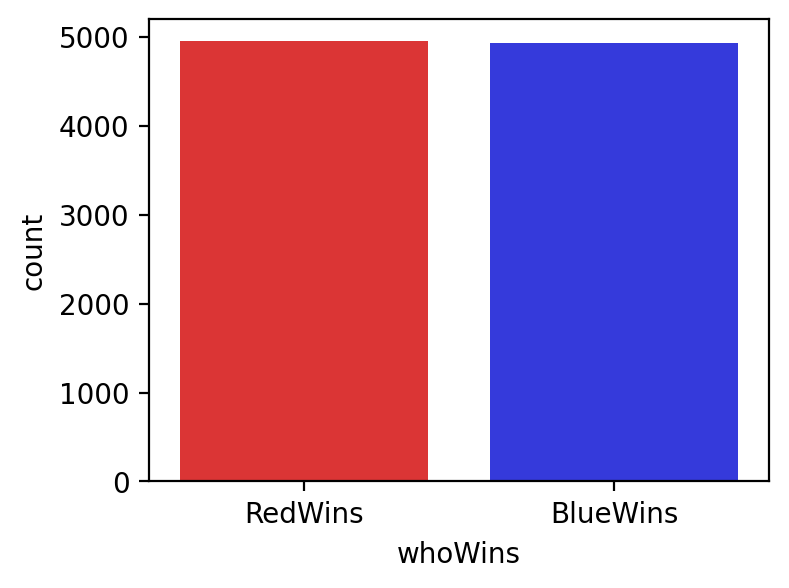

In [17]:
plt.figure(figsize=(4, 3), dpi=200)
sns.countplot(data=df_copy, x="whoWins", palette=palette, linewidth=0.5)

In [18]:
df_copy.whoWins.value_counts()

RedWins     4949
BlueWins    4930
Name: whoWins, dtype: int64

In [19]:
# Kazanma oranları eşit
print(f'Blue Team has %{round(len(df[df["blueWins"]==1]) / len(df),2) * 100} win rate.\n')
print(f'Red Team has %{round(len(df[df["blueWins"]==0]) / len(df),2) * 100} win rate.')

Blue Team has %50.0 win rate.

Red Team has %50.0 win rate.


Analizimiz, oyunun başlangıcında mavinin veya kırmızının takımı olarak başlamanın, oyunun sonucu üzerinde önemli bir etkisi olmadığını göstermektedir.

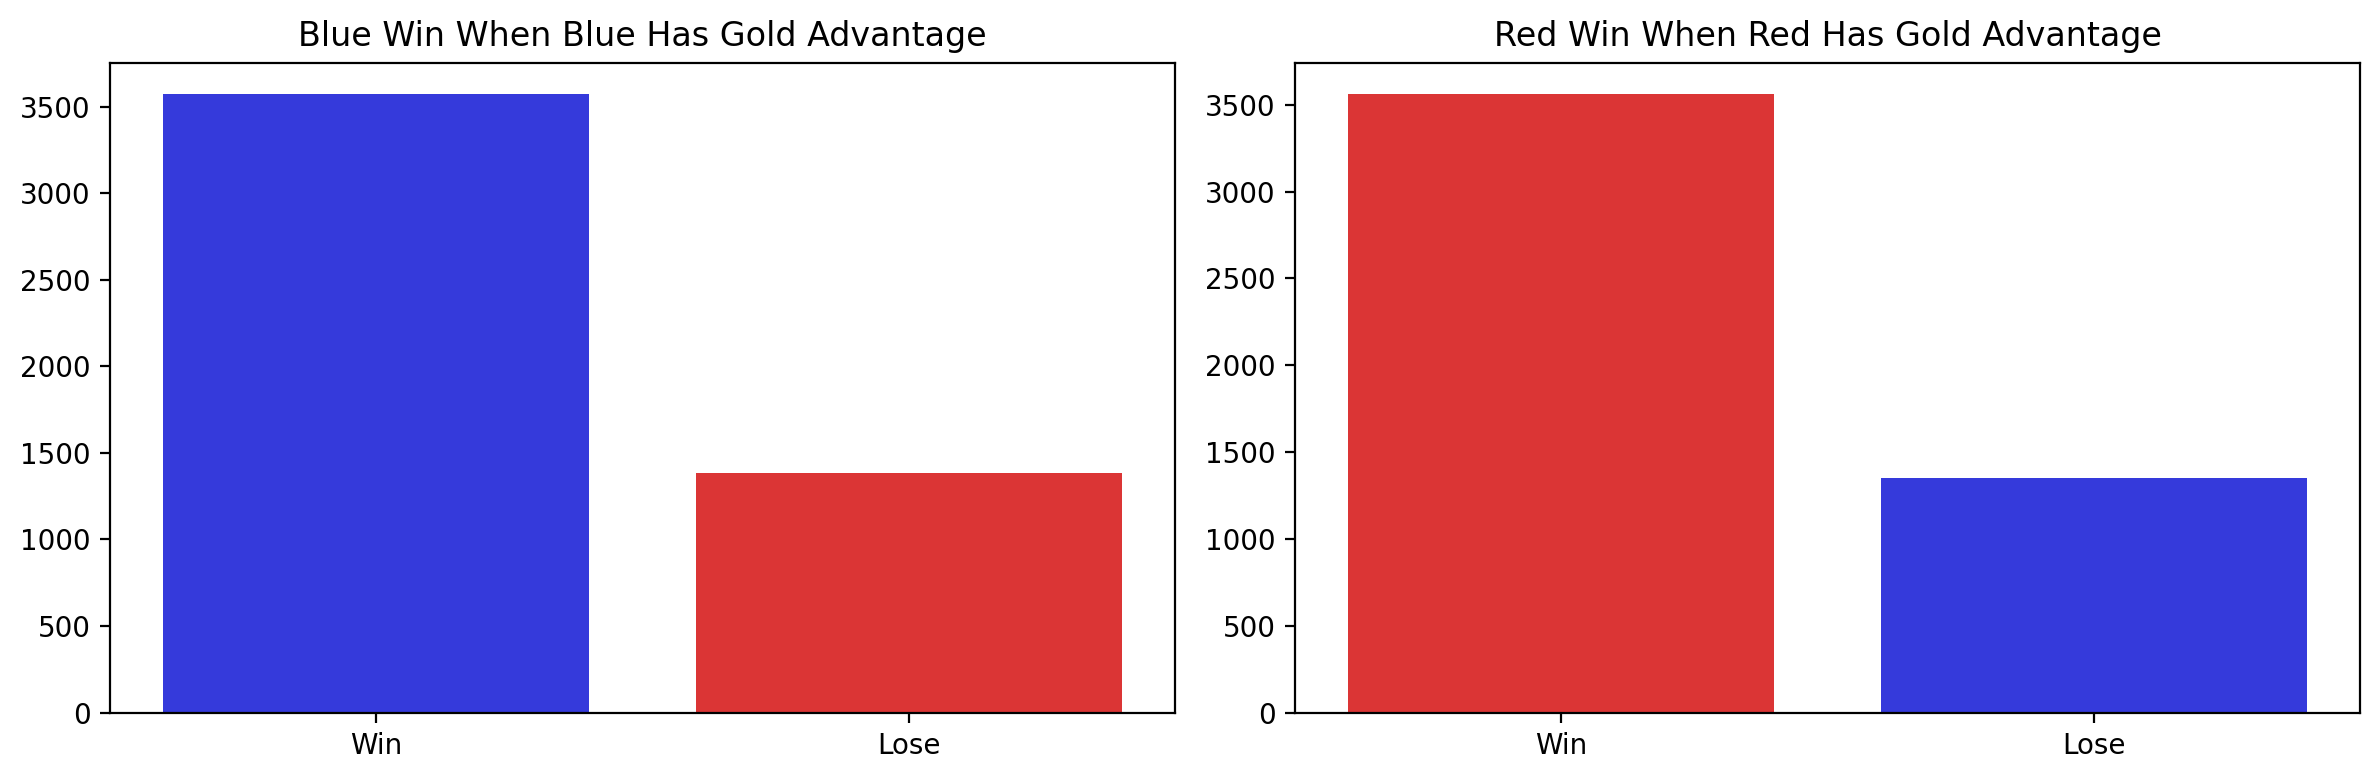

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=200)
sns.barplot(x=df[df["blueGoldDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().index, y=df[df["blueGoldDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().values, ax=ax[0], palette=palette[::-1])
sns.barplot(x=df[df["redGoldDiff"]>0]["blueWins"].replace({0:"Win", 1:"Lose"}).value_counts().index, y=df[df["redGoldDiff"]>0]["blueWins"].replace({0:"Win", 1:"Lose"}).value_counts().values, ax=ax[1], palette=palette)

ax[0].set_title("Blue Win When Blue Has Gold Advantage")
ax[1].set_title("Red Win When Red Has Gold Advantage")

plt.tight_layout()

In [21]:
print(f'When Blue Team has a gold advantage into the 10 minutes of the game, Blue Team has %{round(len(df[(df["blueGoldDiff"]>0) & (df["blueWins"]==1)]) / len(df[df["blueGoldDiff"]>0]),2) * 100} win rate.\n')
print(f'When Red Team has a gold advantage into the 10 minutes of the game, Red Team has %{round(len(df[(df["redGoldDiff"]>0) & (df["blueWins"]==0)]) / len(df[df["redGoldDiff"]>0]),2) * 100} win rate.')

When Blue Team has a gold advantage into the 10 minutes of the game, Blue Team has %72.0 win rate.

When Red Team has a gold advantage into the 10 minutes of the game, Red Team has %72.0 win rate.


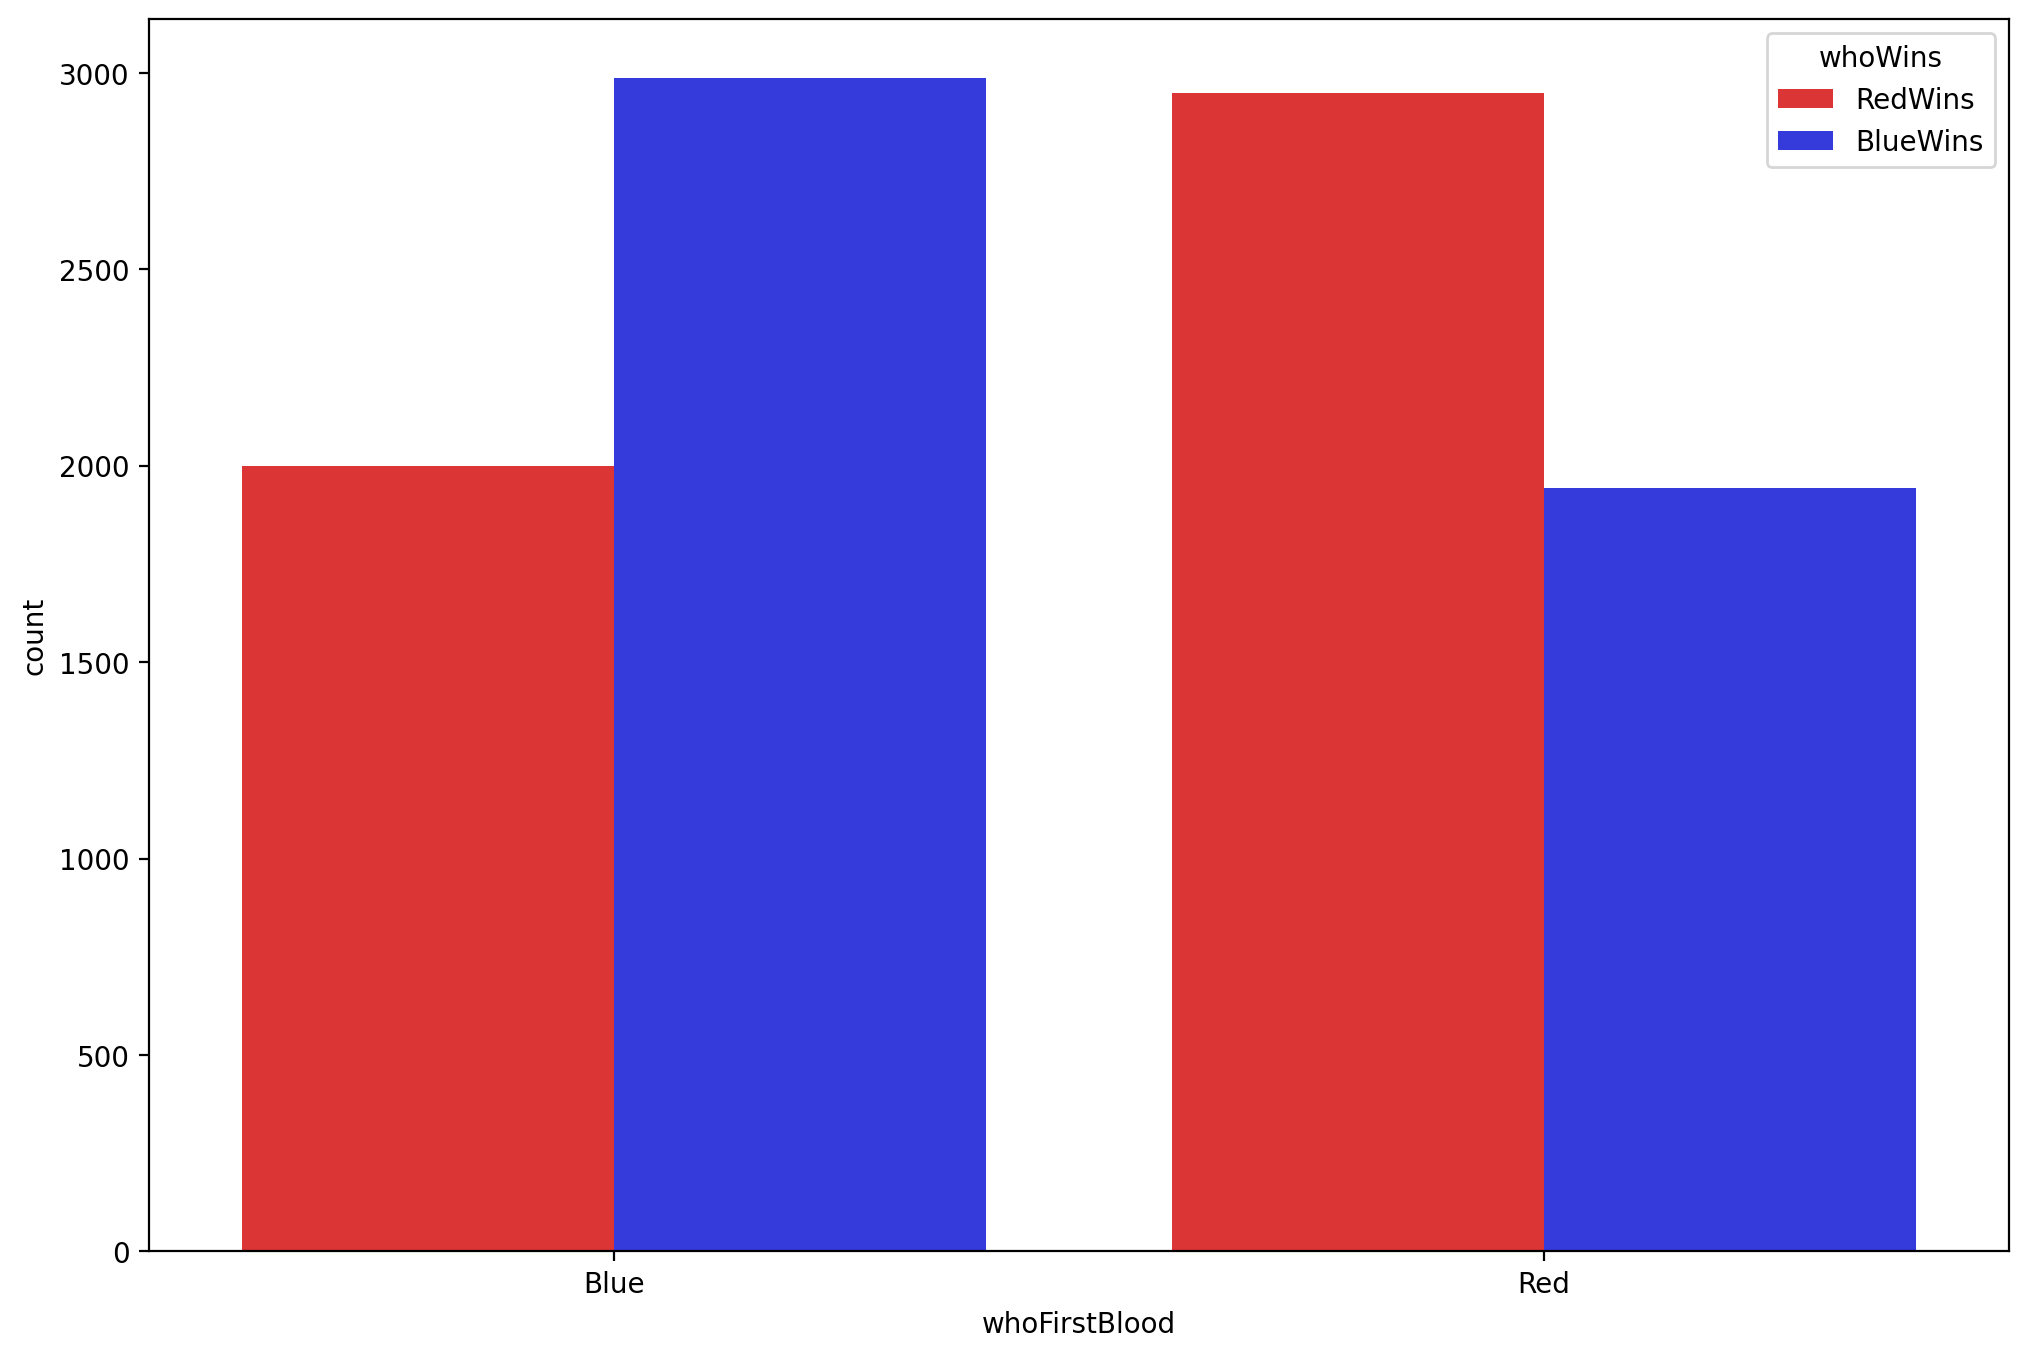

In [22]:
df_copy["whoFirstBlood"] = df.blueFirstBlood.map({0:"Red", 1:"Blue"})
plt.figure(figsize=(12,8), dpi=200)
g = sns.countplot(data=df_copy, x="whoFirstBlood", hue="whoWins", palette=palette)

In [23]:
print(f'When Blue Team got first blood, their win rate is %{round(len(df[(df["blueFirstBlood"]==1) & df["blueWins"]==1]) / len(df[df["blueFirstBlood"]==1]) * 100,2)}\n')
print(f'When Red Team got first blood, their win rate is %{round(len(df[(df["redFirstBlood"]==1) & (df["blueWins"]==0)]) / len(df[df["redFirstBlood"]==1]) * 100,2)}')

When Blue Team got first blood, their win rate is %59.9

When Red Team got first blood, their win rate is %60.28


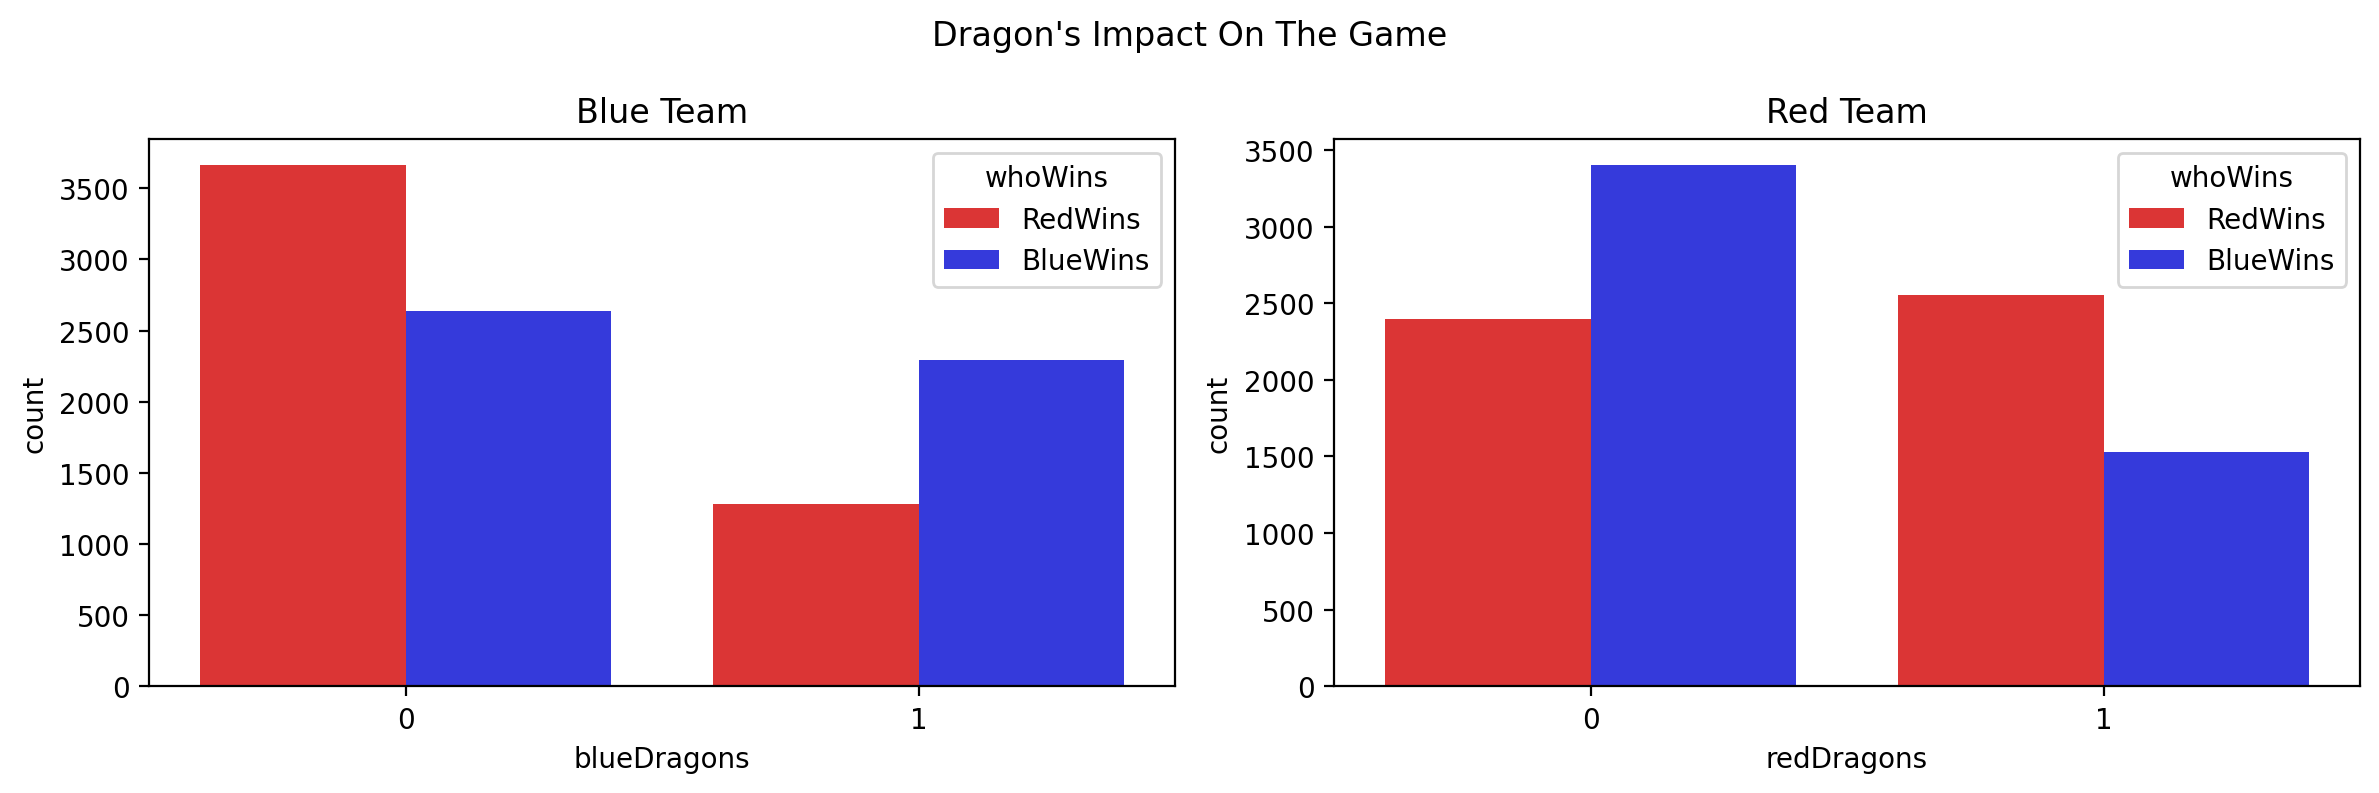

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=200)
sns.countplot(data=df_copy, x="blueDragons", hue="whoWins", ax=ax[0], palette=palette)
sns.countplot(data=df_copy, x="redDragons",hue="whoWins", ax=ax[1], palette=palette)
plt.suptitle("Dragon's Impact On The Game")

ax[0].set_title("Blue Team")
ax[1].set_title("Red Team")

plt.tight_layout()

In [25]:
print(f"In {len(df)} games, {df.redDragons.value_counts()[1]} times Red Team got dragon. When Red Team got the dragon their win rate is %{round(len(df[(df['redDragons'] == 1) & (df['blueWins'] == 0)]) / df.blueDragons.value_counts()[1] * 100,2)}")
print(f"In {len(df)} games, {df.blueDragons.value_counts()[1]} times Blue Team got dragon. When Blue Team got the dragon their win rate is %{round(len(df[(df['blueDragons'] == 1) & (df['blueWins'] == 1)]) / df.blueDragons.value_counts()[1] * 100,2)}")
print(f"In {len(df)} games, {len(df[(df['blueDragons'] == 0) & (df['redDragons'] == 0)])} times neither team got dragon. In those game both team has %{round(len(df[(df['redDragons'] == 0) & (df['blueDragons'] == 0) & (df['blueWins'] == 1)]) / len(df[(df['blueDragons'] == 0) & (df['redDragons'] == 0)]) * 100,2)} win rate.")

In 9879 games, 4081 times Red Team got dragon. When Red Team got the dragon their win rate is %71.42
In 9879 games, 3576 times Blue Team got dragon. When Blue Team got the dragon their win rate is %64.09
In 9879 games, 2222 times neither team got dragon. In those game both team has %50.0 win rate.


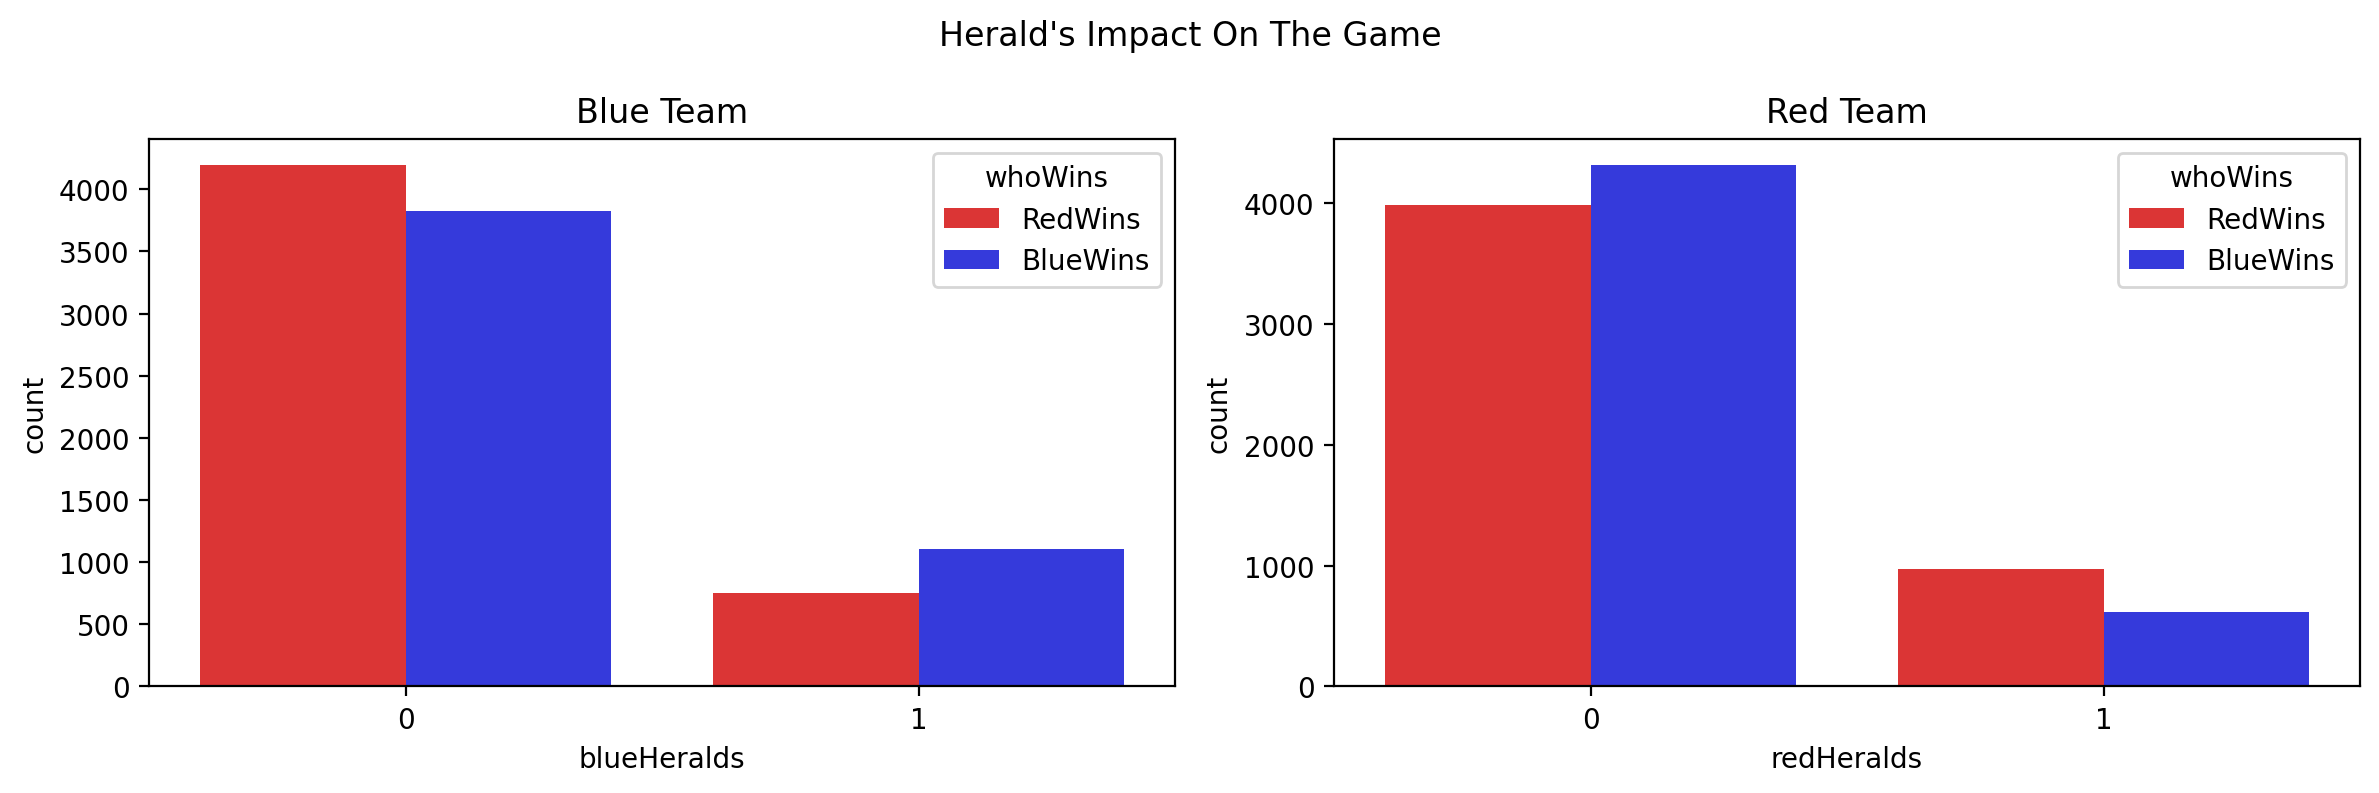

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=200)
sns.countplot(data=df_copy, x="blueHeralds", hue="whoWins", ax=ax[0], palette=palette)
sns.countplot(data=df_copy, x="redHeralds",hue="whoWins", ax=ax[1], palette=palette)
plt.suptitle("Herald's Impact On The Game")

ax[0].set_title("Blue Team")
ax[1].set_title("Red Team")

plt.tight_layout()

In [27]:
print(f"Out of {len(df)} games, Blue Team got herald {len(df[(df['blueHeralds'] == 1)])} times. In those games Blue Team's win rate is {round(len(df[(df['blueHeralds'] == 1) & (df['blueWins'] == 1)]) / len(df[(df['blueHeralds'] == 1)]) * 100,2)}.")
print(f"Out of {len(df)} games, Red Team got herald {len(df[(df['redHeralds'] == 1)])} times. In those games Red Team's win rate is {round(len(df[(df['redHeralds'] == 1) & (df['blueWins'] == 0)]) / len(df[(df['redHeralds'] == 1)]) * 100,2)}")
print(f"Out of {len(df)} games, neither team got herald {len(df[(df['redHeralds'] == 0) & (df['blueHeralds'] == 0)])} times. In those games both team's win rate is {round(len(df[(df['redHeralds'] == 0) & (df['blueHeralds'] == 0) & (df['blueWins'] == 1)]) / len(df[(df['redHeralds'] == 0) & (df['blueHeralds'] == 0)]), 2) * 100}.")

Out of 9879 games, Blue Team got herald 1857 times. In those games Blue Team's win rate is 59.5.
Out of 9879 games, Red Team got herald 1581 times. In those games Red Team's win rate is 61.23
Out of 9879 games, neither team got herald 6441 times. In those games both team's win rate is 50.0.


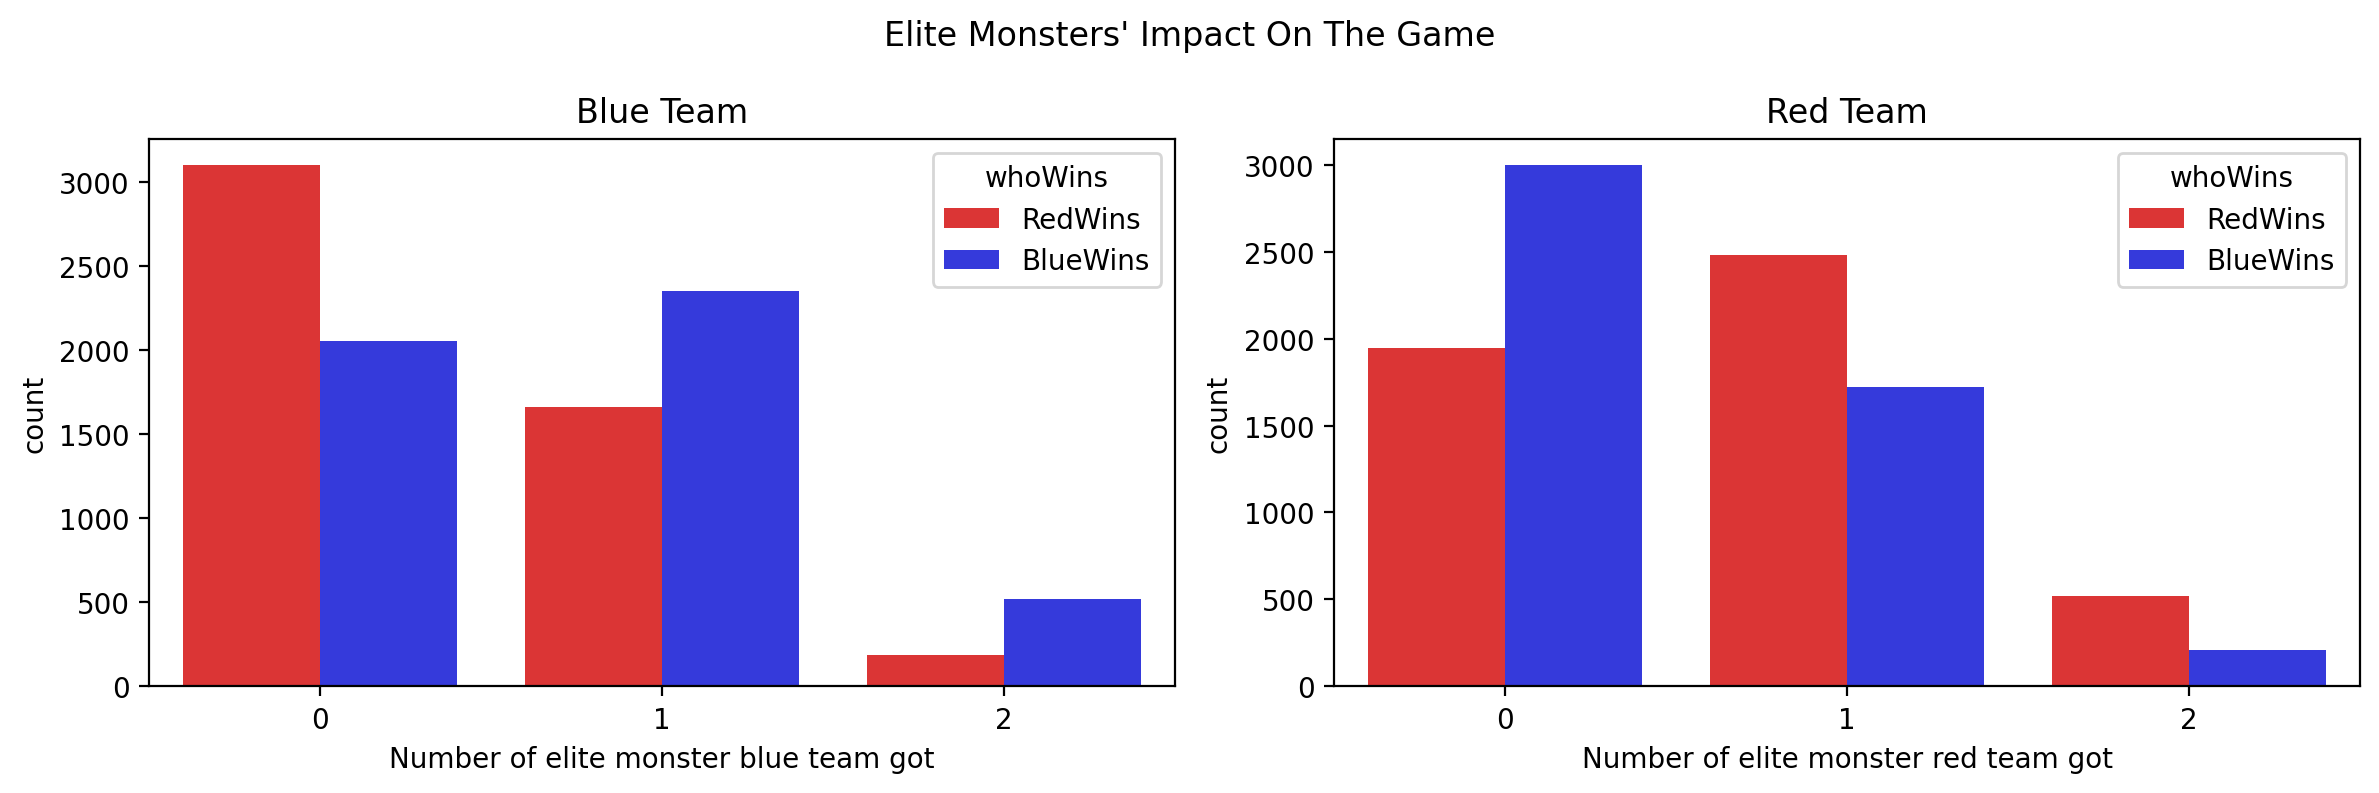

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=200)
sns.countplot(data=df_copy, x="blueEliteMonsters", hue="whoWins", ax=ax[0], palette=palette)
sns.countplot(data=df_copy, x="redEliteMonsters",hue="whoWins", ax=ax[1], palette=palette)
plt.suptitle("Elite Monsters' Impact On The Game")

ax[0].set_title("Blue Team")
ax[0].set_xlabel("Number of elite monster blue team got")

ax[1].set_title("Red Team")
ax[1].set_xlabel("Number of elite monster red team got")

plt.tight_layout()

In [29]:
print(f"Out of {len(df)} games, Blue Team got both herald and dragon for {len(df[df['blueEliteMonsters'] == 2])} times. In those games Blue Team's win rate is %{round(len(df[(df['blueEliteMonsters'] == 2) & (df['blueWins'] == 1)]) / len(df[df['blueEliteMonsters'] == 2]) * 100,2)}")
print(f"Out of {len(df)} games, Red Team got both herald and dragon for {len(df[df['redEliteMonsters'] == 2])} times. In those games Red Team's win rate is %{round(len(df[(df['redEliteMonsters'] == 2) & (df['blueWins'] == 0)]) / len(df[df['redEliteMonsters'] == 2]) * 100,2)}")

Out of 9879 games, Blue Team got both herald and dragon for 710 times. In those games Blue Team's win rate is %73.52
Out of 9879 games, Red Team got both herald and dragon for 730 times. In those games Red Team's win rate is %71.37


In [30]:
print(f"When both teams got no elite monsters, Blue Team's win rate is %{round(len(df[(df['redEliteMonsters'] == 0) & (df['blueEliteMonsters'] == 0) & (df['blueWins'] == 1)]) /len(df[(df['redEliteMonsters'] == 0) & (df['blueEliteMonsters'] == 0)]) * 100,2)}.")

When both teams got no elite monsters, Blue Team's win rate is %50.44.


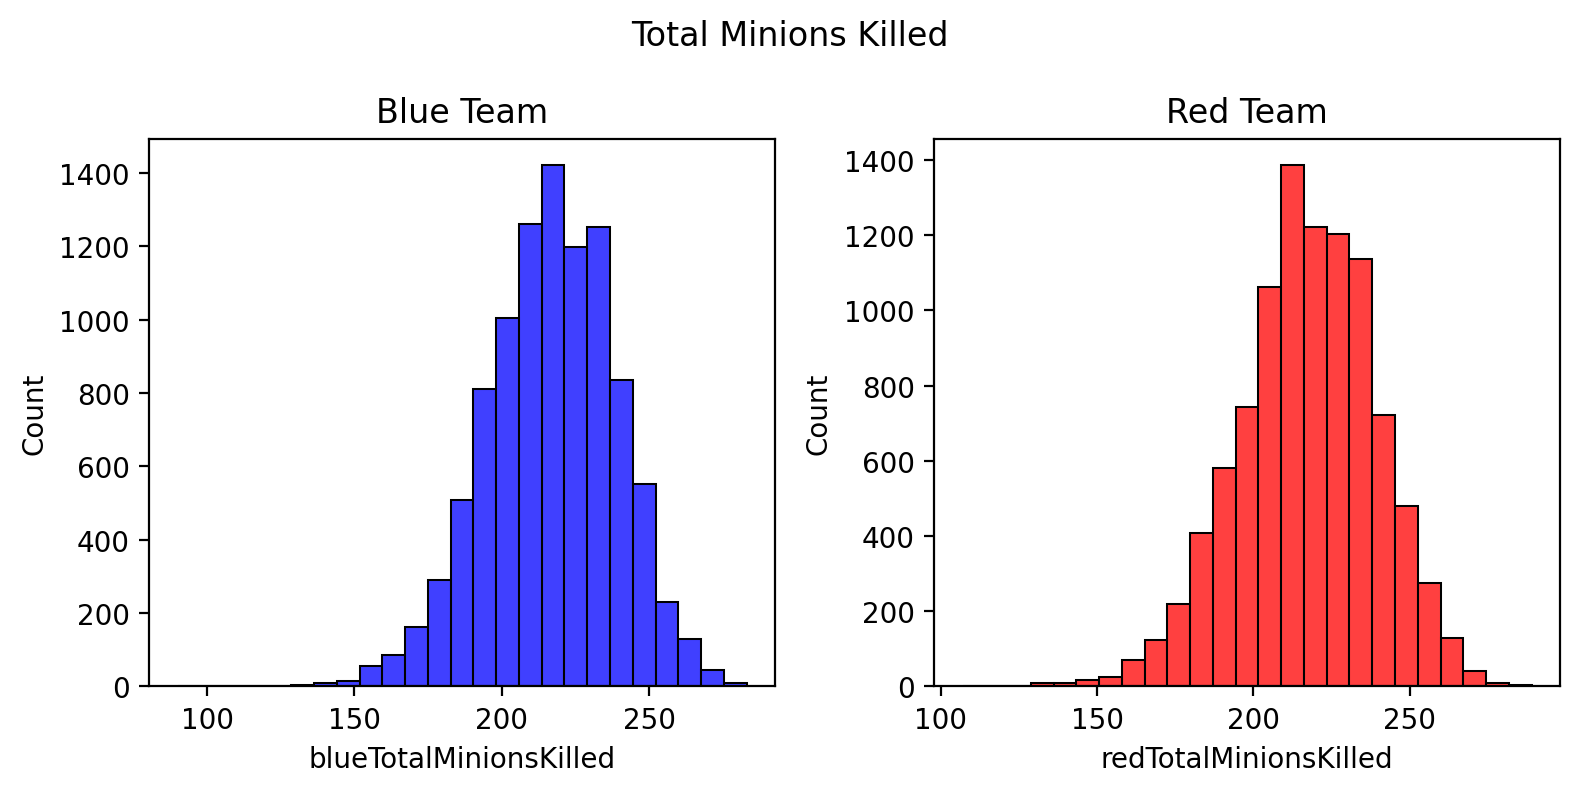

In [31]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=200)

sns.histplot(data=df_copy, x="blueTotalMinionsKilled", bins=25, ax=ax[0], color="b")
sns.histplot(data=df_copy, x="redTotalMinionsKilled", bins=25, ax=ax[1], color="r")

plt.suptitle("Total Minions Killed")

ax[0].set_title("Blue Team")
ax[1].set_title("Red Team")

plt.tight_layout()

In [32]:
print(f"When Blue Team wins, their average minion score is {round(df[df['blueWins']==1]['blueTotalMinionsKilled'].mean(),2)}")
print(f"When Blue Team loses, their average minions score is {round(df[df['blueWins']==0]['blueTotalMinionsKilled'].mean(),2)}")
print("-"*70)
print(f"When Red Team wins, their average minion score is {round(df[df['blueWins']==0]['redTotalMinionsKilled'].mean(),2)}")
print(f"When Red Team loses, their average minions score is {round(df[df['blueWins']==1]['redTotalMinionsKilled'].mean(),2)}")

When Blue Team wins, their average minion score is 221.62
When Blue Team loses, their average minions score is 211.79
----------------------------------------------------------------------
When Red Team wins, their average minion score is 221.99
When Red Team loses, their average minions score is 212.69


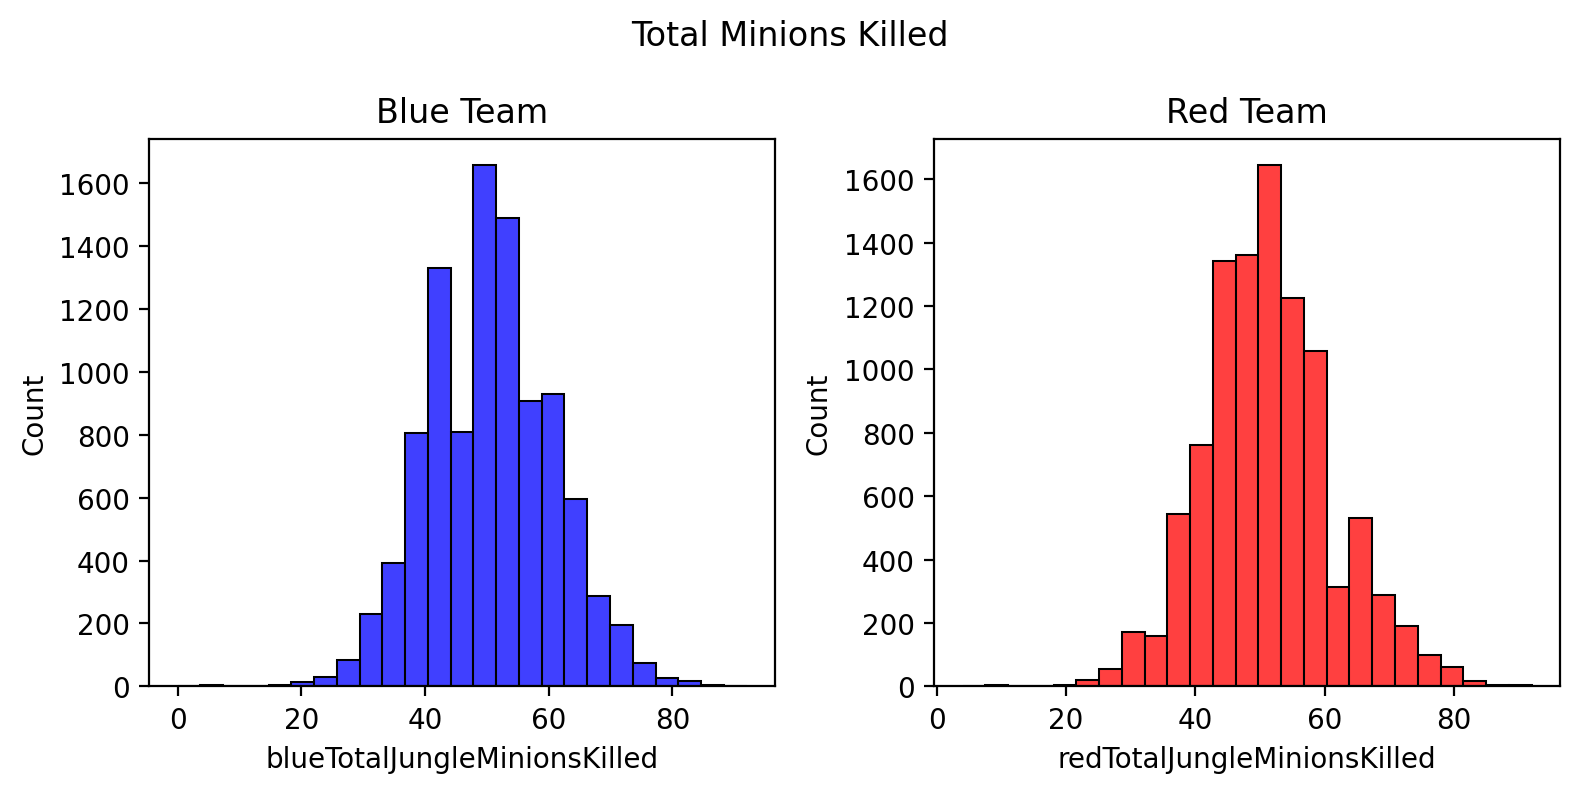

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=200)

sns.histplot(data=df_copy, x="blueTotalJungleMinionsKilled", bins=25, ax=ax[0], color="b")
sns.histplot(data=df_copy, x="redTotalJungleMinionsKilled", bins=25, ax=ax[1], color="r")

plt.suptitle("Total Minions Killed")

ax[0].set_title("Blue Team")
ax[1].set_title("Red Team")

plt.tight_layout()

In [34]:
print(f'When Blue Team wins, their average jungle minion score is {round(df[df["blueWins"]==1]["blueTotalJungleMinionsKilled"].mean(),2)}')
print(f'When Blue Team loses, their average jungle minion score is {round(df[df["blueWins"]==0]["blueTotalJungleMinionsKilled"].mean(),2)}')
print("-"*65)
print(f'When Red Team wins, their average jungle minion score is {round(df[df["blueWins"]==0]["redTotalJungleMinionsKilled"].mean(),2)}')
print(f'When Red Team loses, their average jungle minion score is {round(df[df["blueWins"]==1]["redTotalJungleMinionsKilled"].mean(),2)}')

When Blue Team wins, their average jungle minion score is 51.81
When Blue Team loses, their average jungle minion score is 49.21
-----------------------------------------------------------------
When Red Team wins, their average jungle minion score is 52.42
When Red Team loses, their average jungle minion score is 50.2


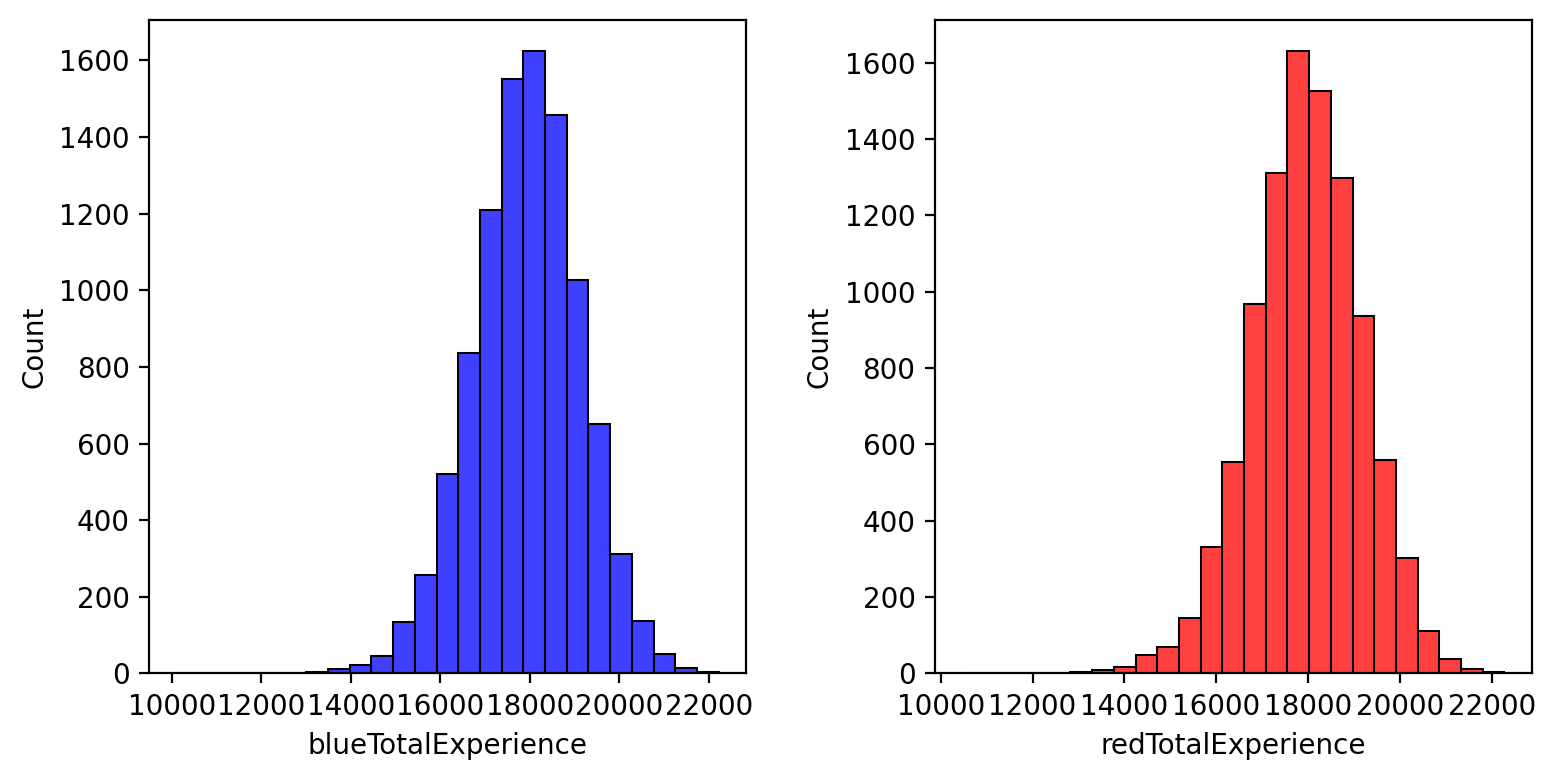

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=200)

sns.histplot(data=df_copy, x="blueTotalExperience", bins=25, ax=ax[0], color="b")

sns.histplot(data=df_copy, x="redTotalExperience", bins=25, ax=ax[1], color="r")

plt.tight_layout()

In [36]:
print(f'When Blue Team wins, their average total experince is {round(df[df["blueWins"] == 1].blueTotalExperience.mean(),2)}')
print(f'When Blue Team loses, their average total experince is {round(df[df["blueWins"] == 0].blueTotalExperience.mean(),2)}')
print("-"*70)
print(f'When Red Team wins, their average total experince is {round(df[df["blueWins"] == 0].redTotalExperience.mean(),2)}')
print(f'When Red Team loses, their average total experince is {round(df[df["blueWins"] == 1].redTotalExperience.mean(),2)}')

When Blue Team wins, their average total experince is 18404.58
When Blue Team loses, their average total experince is 17453.47
----------------------------------------------------------------------
When Red Team wins, their average total experince is 18425.37
When Red Team loses, their average total experince is 17496.3


In [37]:
print(f'When Blue Team wins, their average level is {round(df[df["blueWins"]==1].blueAvgLevel.mean(),2)}')
print(f'When Blue Team loses, their average level is {round(df[df["blueWins"]==0].blueAvgLevel.mean(),2)}')
print("-"*50)
print(f'When Red Team wins, their average level is {round(df[df["blueWins"]==0].redAvgLevel.mean(),2)}')
print(f'When Red Team loses, their average level is {round(df[df["blueWins"]==1].redAvgLevel.mean(),2)}')

When Blue Team wins, their average level is 7.03
When Blue Team loses, their average level is 6.81
--------------------------------------------------
When Red Team wins, their average level is 7.03
When Red Team loses, their average level is 6.82


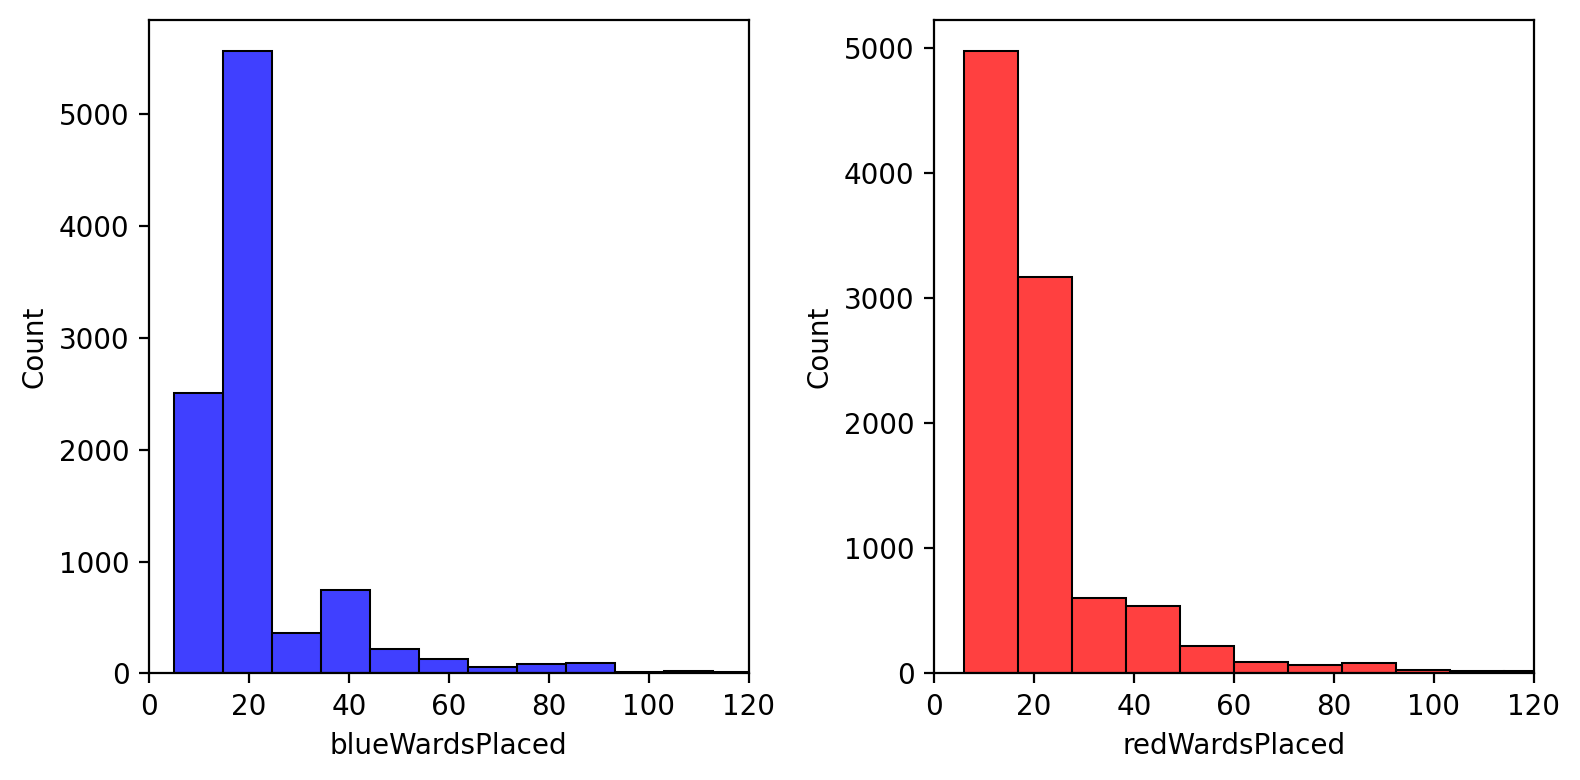

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=200)

sns.histplot(data=df_copy, x="blueWardsPlaced", bins=25, ax=ax[0], color="b")
ax[0].set_xlim(0,120)

sns.histplot(data=df_copy, x="redWardsPlaced", bins=25, ax=ax[1], color="r")
ax[1].set_xlim(0,120)
plt.tight_layout()

In [39]:
print(f"When Blue Team wins, their average ward score is {round(df[df['blueWins'] == 1]['blueWardsPlaced'].mean(),2)}")
print(f"When Blue Team loses, their average ward score is {round(df[df['blueWins'] == 0]['blueWardsPlaced'].mean(),2)}")
print("-"*60)
print(f'When Red Team wins, their average ward score is {round(df[df["blueWins"] == 0]["redWardsPlaced"].mean(),2)}0')
print(f'When Red Team loses, their average ward score is {round(df[df["blueWins"] == 1]["redWardsPlaced"].mean(),2)}')
print("-"*60)
print(f'When Blue Team wins, they destroyed {round(df[df["blueWins"] == 1]["blueWardsDestroyed"].mean(),2)} wards per game.')
print(f'When Red Team wins, they destroyed {round(df[df["blueWins"] == 0]["redWardsDestroyed"].mean(),2)} wards per game.')

When Blue Team wins, their average ward score is 22.29
When Blue Team loses, their average ward score is 22.29
------------------------------------------------------------
When Red Team wins, their average ward score is 22.80
When Red Team loses, their average ward score is 21.93
------------------------------------------------------------
When Blue Team wins, they destroyed 2.92 wards per game.
When Red Team wins, they destroyed 2.84 wards per game.


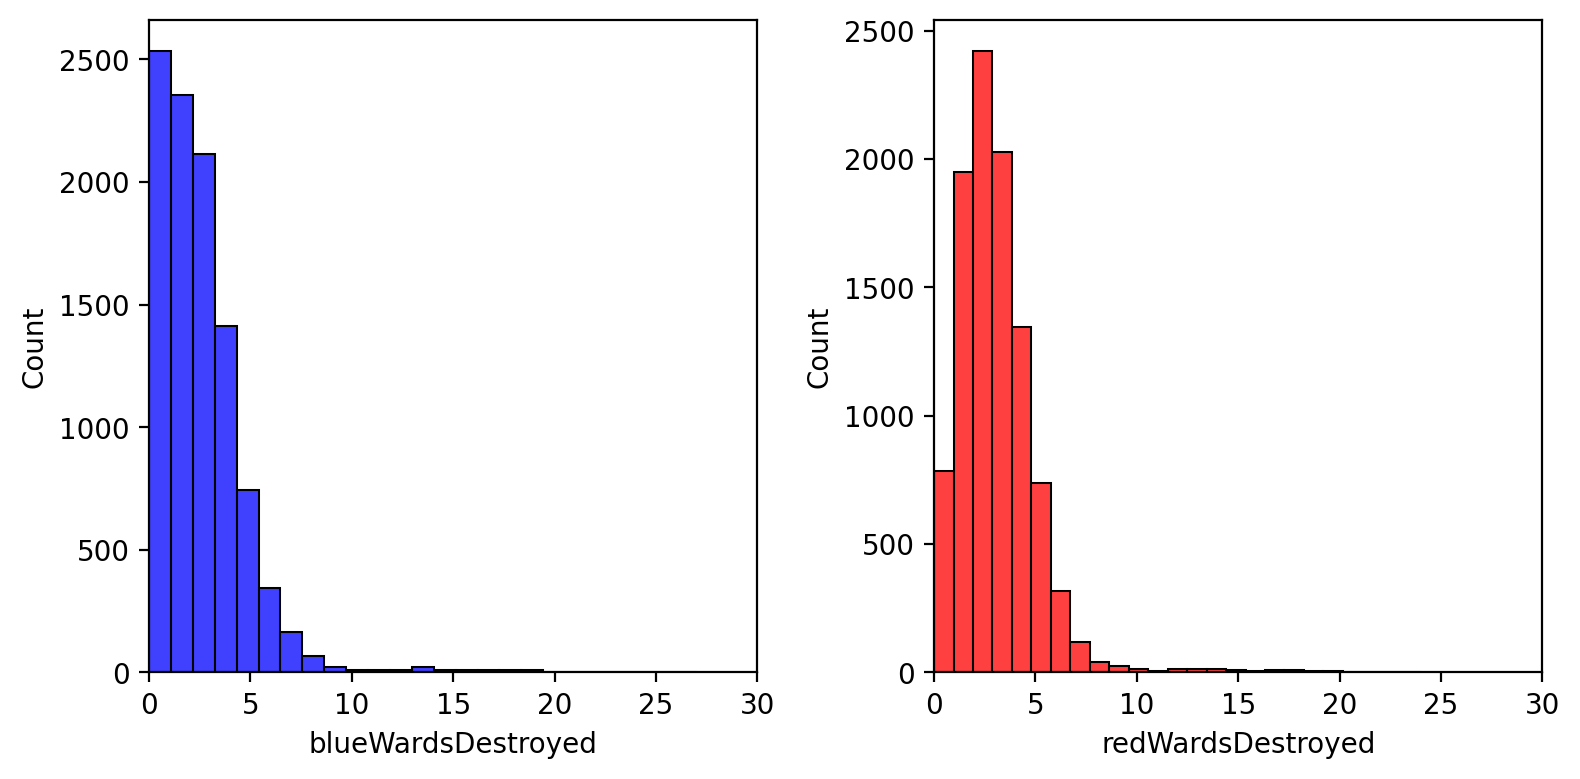

In [40]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=200)

sns.histplot(data=df_copy, x="blueWardsDestroyed", bins=25, ax=ax[0], color="b")
ax[0].set_xlim(0,30)

sns.histplot(data=df_copy, x="redWardsDestroyed", bins=25, ax=ax[1], color="r")
ax[1].set_xlim(0,30)
plt.tight_layout()

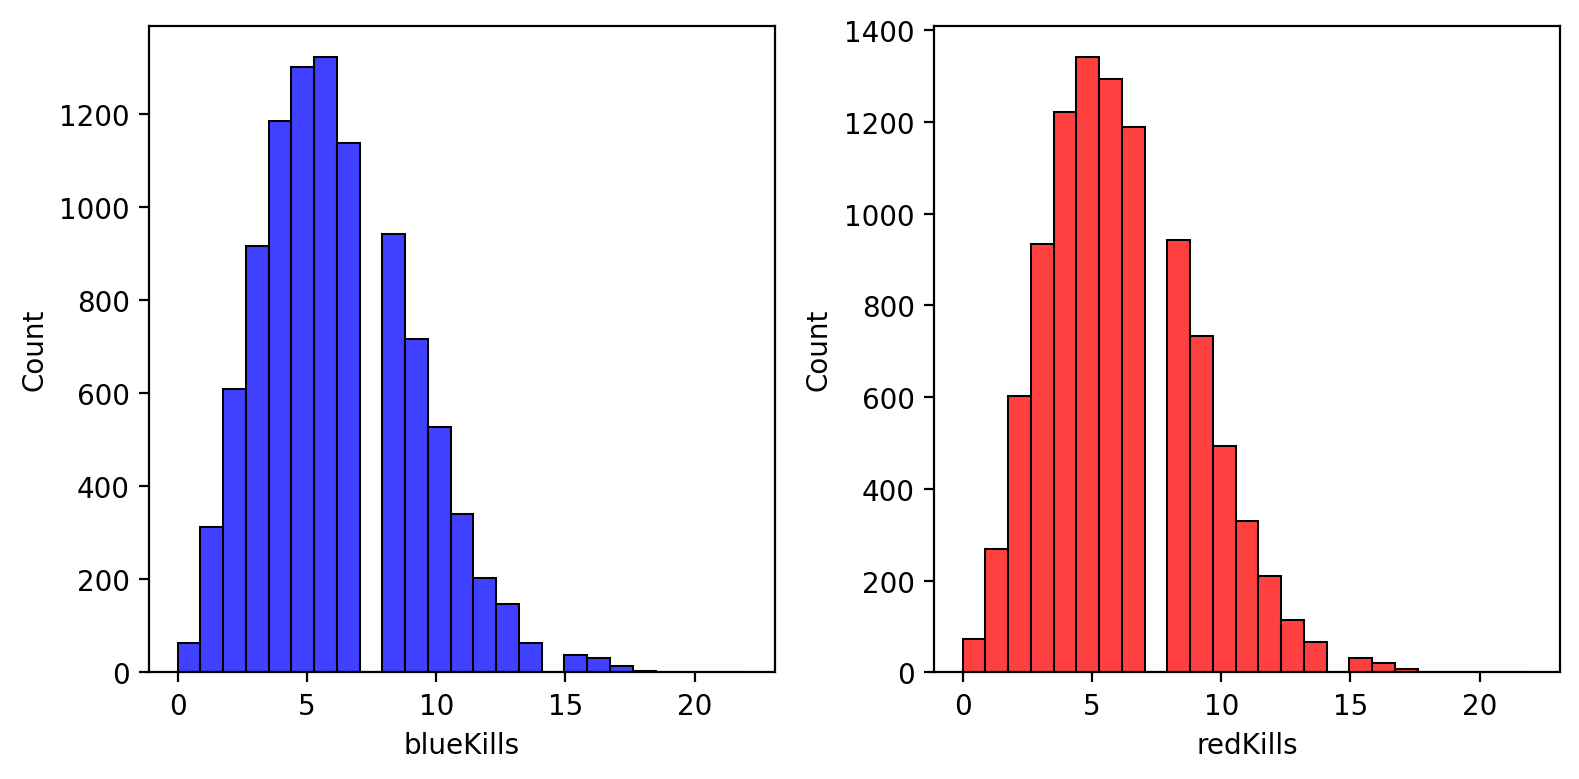

In [41]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=200)

sns.histplot(data=df_copy, x="blueKills", bins=25, ax=ax[0], color="b")

sns.histplot(data=df_copy, x="redKills", bins=25, ax=ax[1], color="r")
plt.tight_layout()

In [42]:
print(f'KDA means Kills/Deaths/Assists. Lets chech KDAs of each team when win and lose.')
print(f'When Blue Team Wins, their average KDA is {round(df[df["blueWins"] == 1].blueKills.mean(),1)}/{round(df[df["blueWins"] == 1].blueAssists.mean(),1)}/{round(df[df["blueWins"] == 1].blueDeaths.mean(),1)}')
print(f'When Blue Team loses, their average KDA is {round(df[df["blueWins"] == 0].blueKills.mean(),1)}/{round(df[df["blueWins"] == 0].blueAssists.mean(),1)}/{round(df[df["blueWins"] == 0].blueDeaths.mean(),1)}')
print("-"*60)
print(f'When Red Team Wins, their average KDA is {round(df[df["blueWins"] == 0].redKills.mean(),1)}/{round(df[df["blueWins"] == 0].redAssists.mean(),1)}/{round(df[df["blueWins"] == 0].redDeaths.mean(),1)}')
print(f'When Red Team Wins, their average KDA is {round(df[df["blueWins"] == 1].redKills.mean(),1)}/{round(df[df["blueWins"] == 1].redAssists.mean(),1)}/{round(df[df["blueWins"] == 1].redDeaths.mean(),1)}')

KDA means Kills/Deaths/Assists. Lets chech KDAs of each team when win and lose.
When Blue Team Wins, their average KDA is 7.2/7.8/5.1
When Blue Team loses, their average KDA is 5.2/5.5/7.1
------------------------------------------------------------
When Red Team Wins, their average KDA is 7.1/7.8/5.2
When Red Team Wins, their average KDA is 5.1/5.6/7.2


### İlişkisel Analiz

In [43]:
correlation = df.select_dtypes(include='number').corr()["blueWins"].sort_values(ascending=False).drop("blueWins")

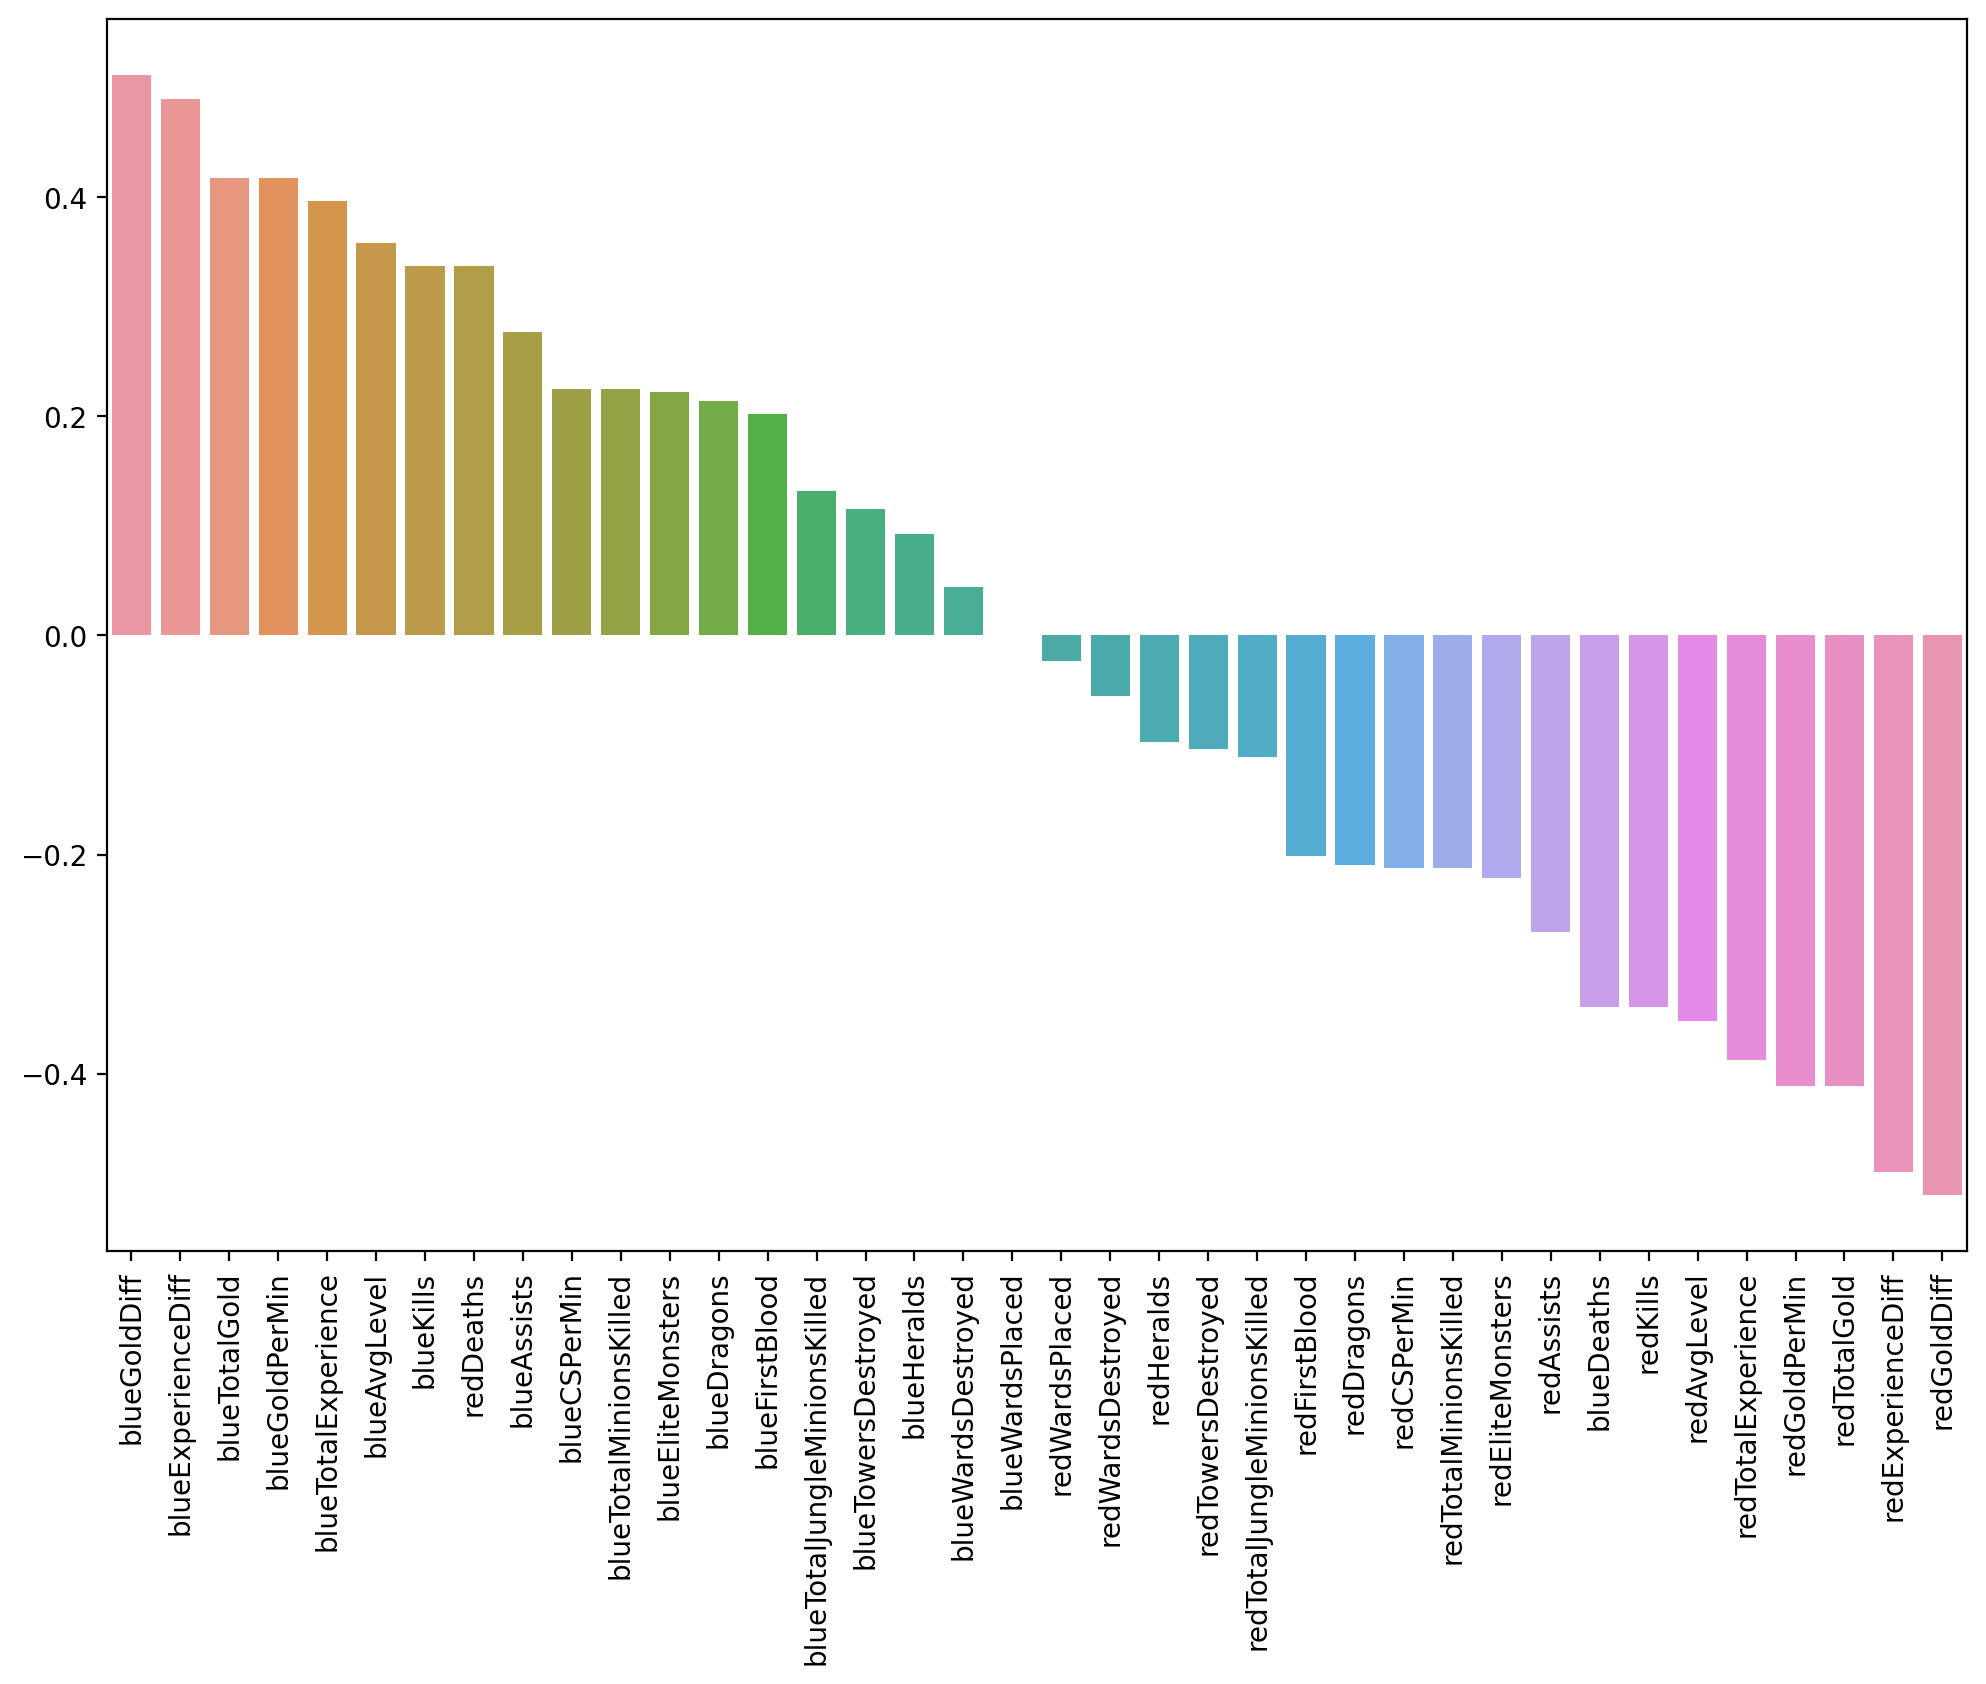

In [44]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90);

In [45]:
correlation

blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
blueTotalExperience             0.396141
blueAvgLevel                    0.357820
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
blueDragons                     0.213768
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
blueHeralds                     0.092385
blueWardsDestroyed              0.044247
blueWardsPlaced                 0.000087
redWardsPlaced                 -0.023671
redWardsDestroyed              -0.055400
redHeralds                     -0.097172
redTowersDestroyed             -0.103696
redTotalJungleMinionsKilled    -0.110994
redFirstBlood   

Korelasyonun bar grafiği, bir oyunu kazanmada en etkili özelliğin takımlar arasındaki altın farkı olduğunu açıkça göstermektedir. Harita farkındalığının etkisi düşüktür.

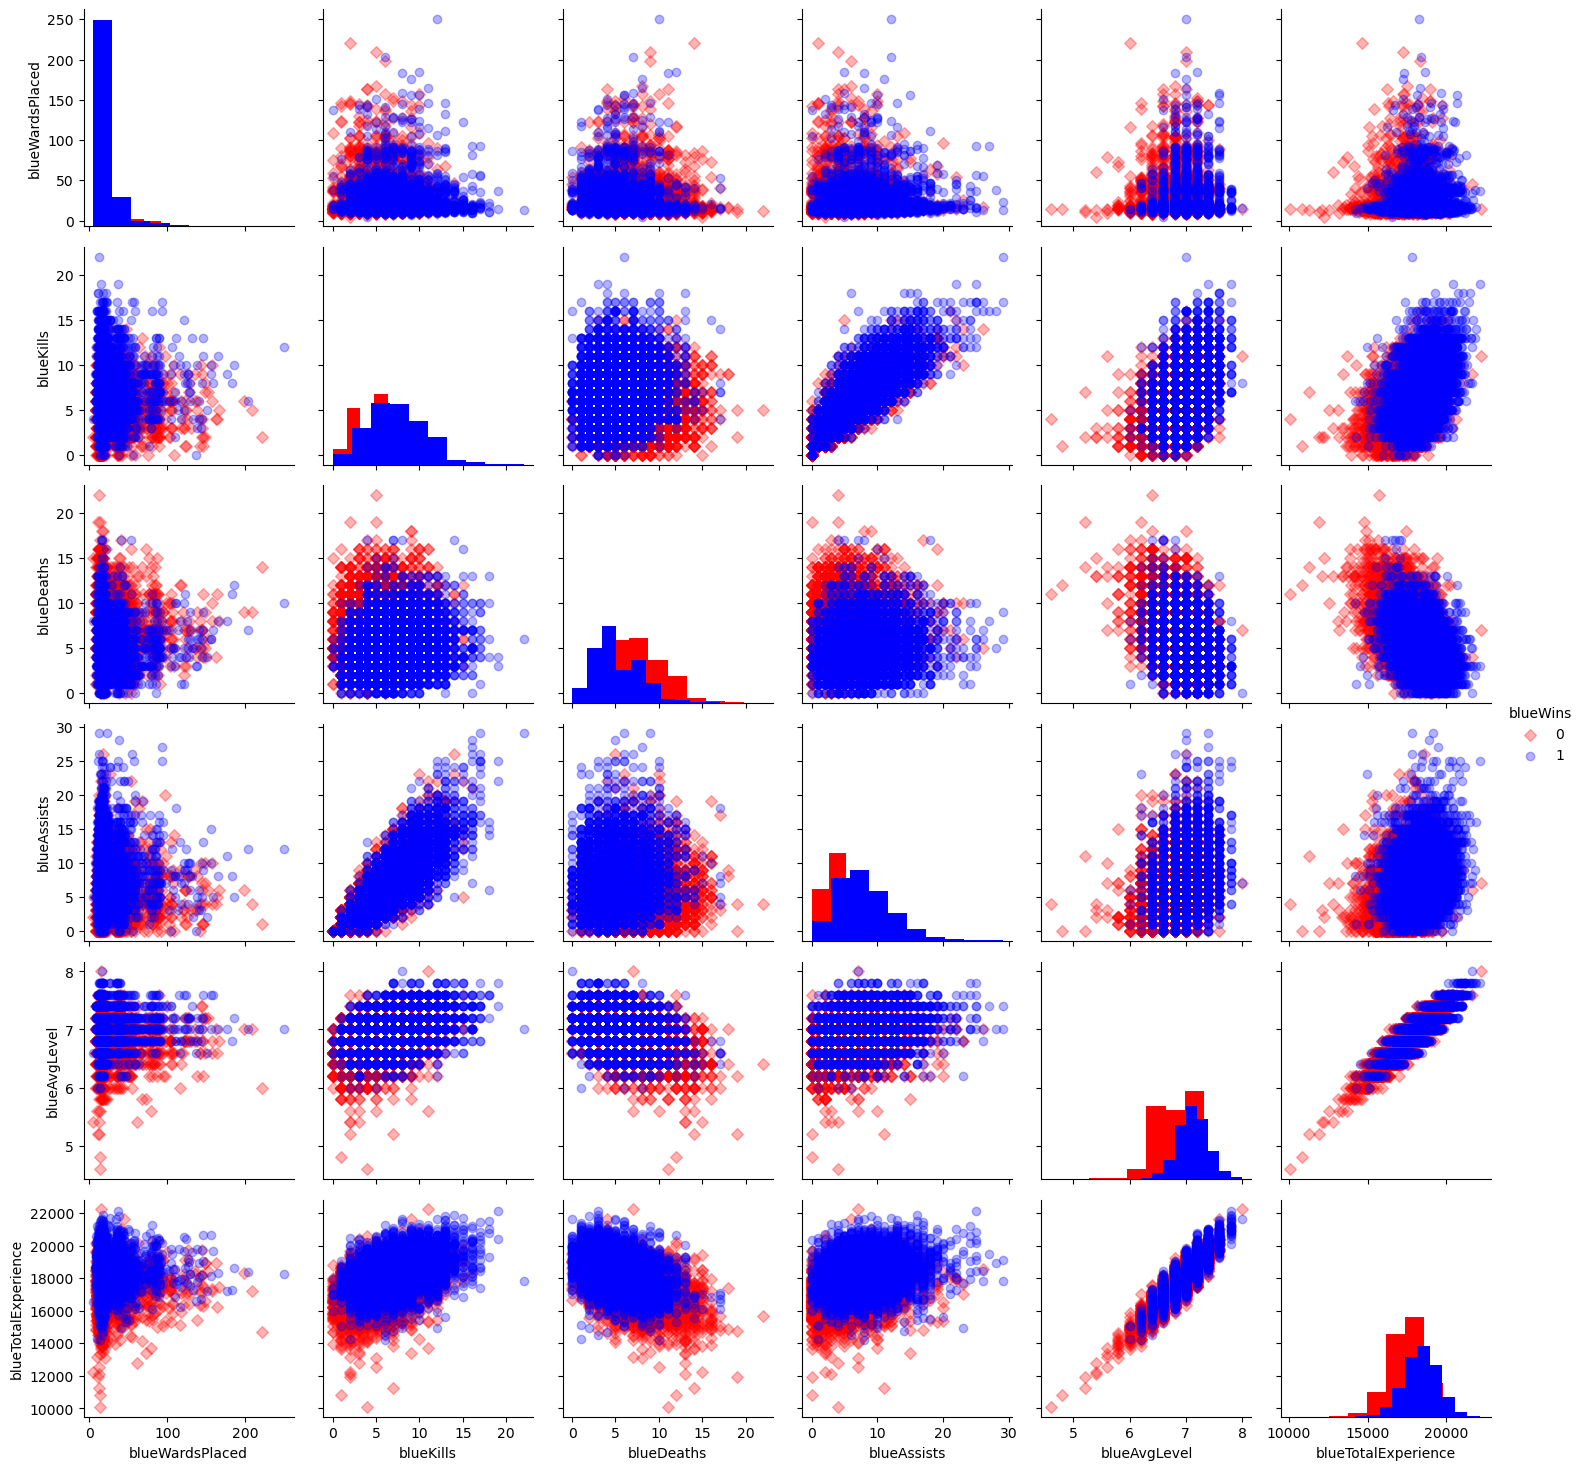

In [46]:
g = sns.PairGrid(data = df, vars=['blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueAssists', 'blueAvgLevel', 'blueTotalExperience'], hue='blueWins', palette=sns.color_palette(['r', 'b']), hue_kws={"marker": ["D", "o"], "alpha": [0.3, 0.3]})
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

In [47]:
# veri setini shufflelıyoruz
df = df.sample(frac=1).reset_index(drop=True)

In [48]:
#  bağımlı değişken(y), bağımsız değişkenden(X) ayrıldı.
y = df["blueWins"]
X = df.drop("blueWins", axis=1, inplace= False)

In [49]:
X

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0                  84                   3               1          5   
1                  14                   1               1          6   
2                  16                   1               0          9   
3                  15                   1               0          2   
4                  15                   6               1          3   
...               ...                 ...             ...        ...   
9874               19                   1               1          6   
9875               13                   2               0          3   
9876               15                   2               0          8   
9877               17                   1               1          6   
9878               15                   2               0          7   

      blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0              7            4                  1            1            0   
1             10            5                  0            0            0   
2              7           12                  1            1            0   
3             10            1                  1            0            1   
4              5            3                  1            1            0   
...          ...          ...                ...          ...          ...   
9874           3            6                  2            1            1   
9875           9            1                  0            0            0   
9876          10            9                  0            0            0   
9877           8            4                  1            1            0   
9878           5           11                  0            0            0   

      blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                       0          16605           7.0                17961   
1                       0          17250           7.0                18266   
2                       0          17908           7.0                17505   
3                       0          13726           6.2                16098   
4                       0          15295           6.8                17054   
...                   ...            ...           ...                  ...   
9874                    0          17201           6.8                17943   
9875                    0          14100           6.4                16543   
9876                    0          16722           6.6                16113   
9877                    0          16021           6.8                18021   
9878                    0          17450           7.0                18559   

      blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                        207                            69            31   
1                        222                            60          -862   
2                        220                            55          1717   
3                        184                            52         -4474   
4                        210                            48            98   
...                      ...                           ...           ...   
9874                     186                            67          2184   
9875                     189                            52         -4603   
9876                     190                            47          -978   
9877                     199                            48          -620   
9878                     236                            54          1294   

      blueExperienceDiff  blueCSPerMin  blueGoldPerMin  redWardsPlaced  \
0                   -189          20.7          1660.5              17   
1                  -1596          22.2          1725.0              11   
2                    775          22.0          1790.8              10   
3                  -5216          18.4        

In [50]:
# hedef özelliğimiz
y

0       0
1       0
2       1
3       0
4       1
       ..
9874    1
9875    0
9876    0
9877    1
9878    0
Name: blueWins, Length: 9879, dtype: int64

### Isı Haritası

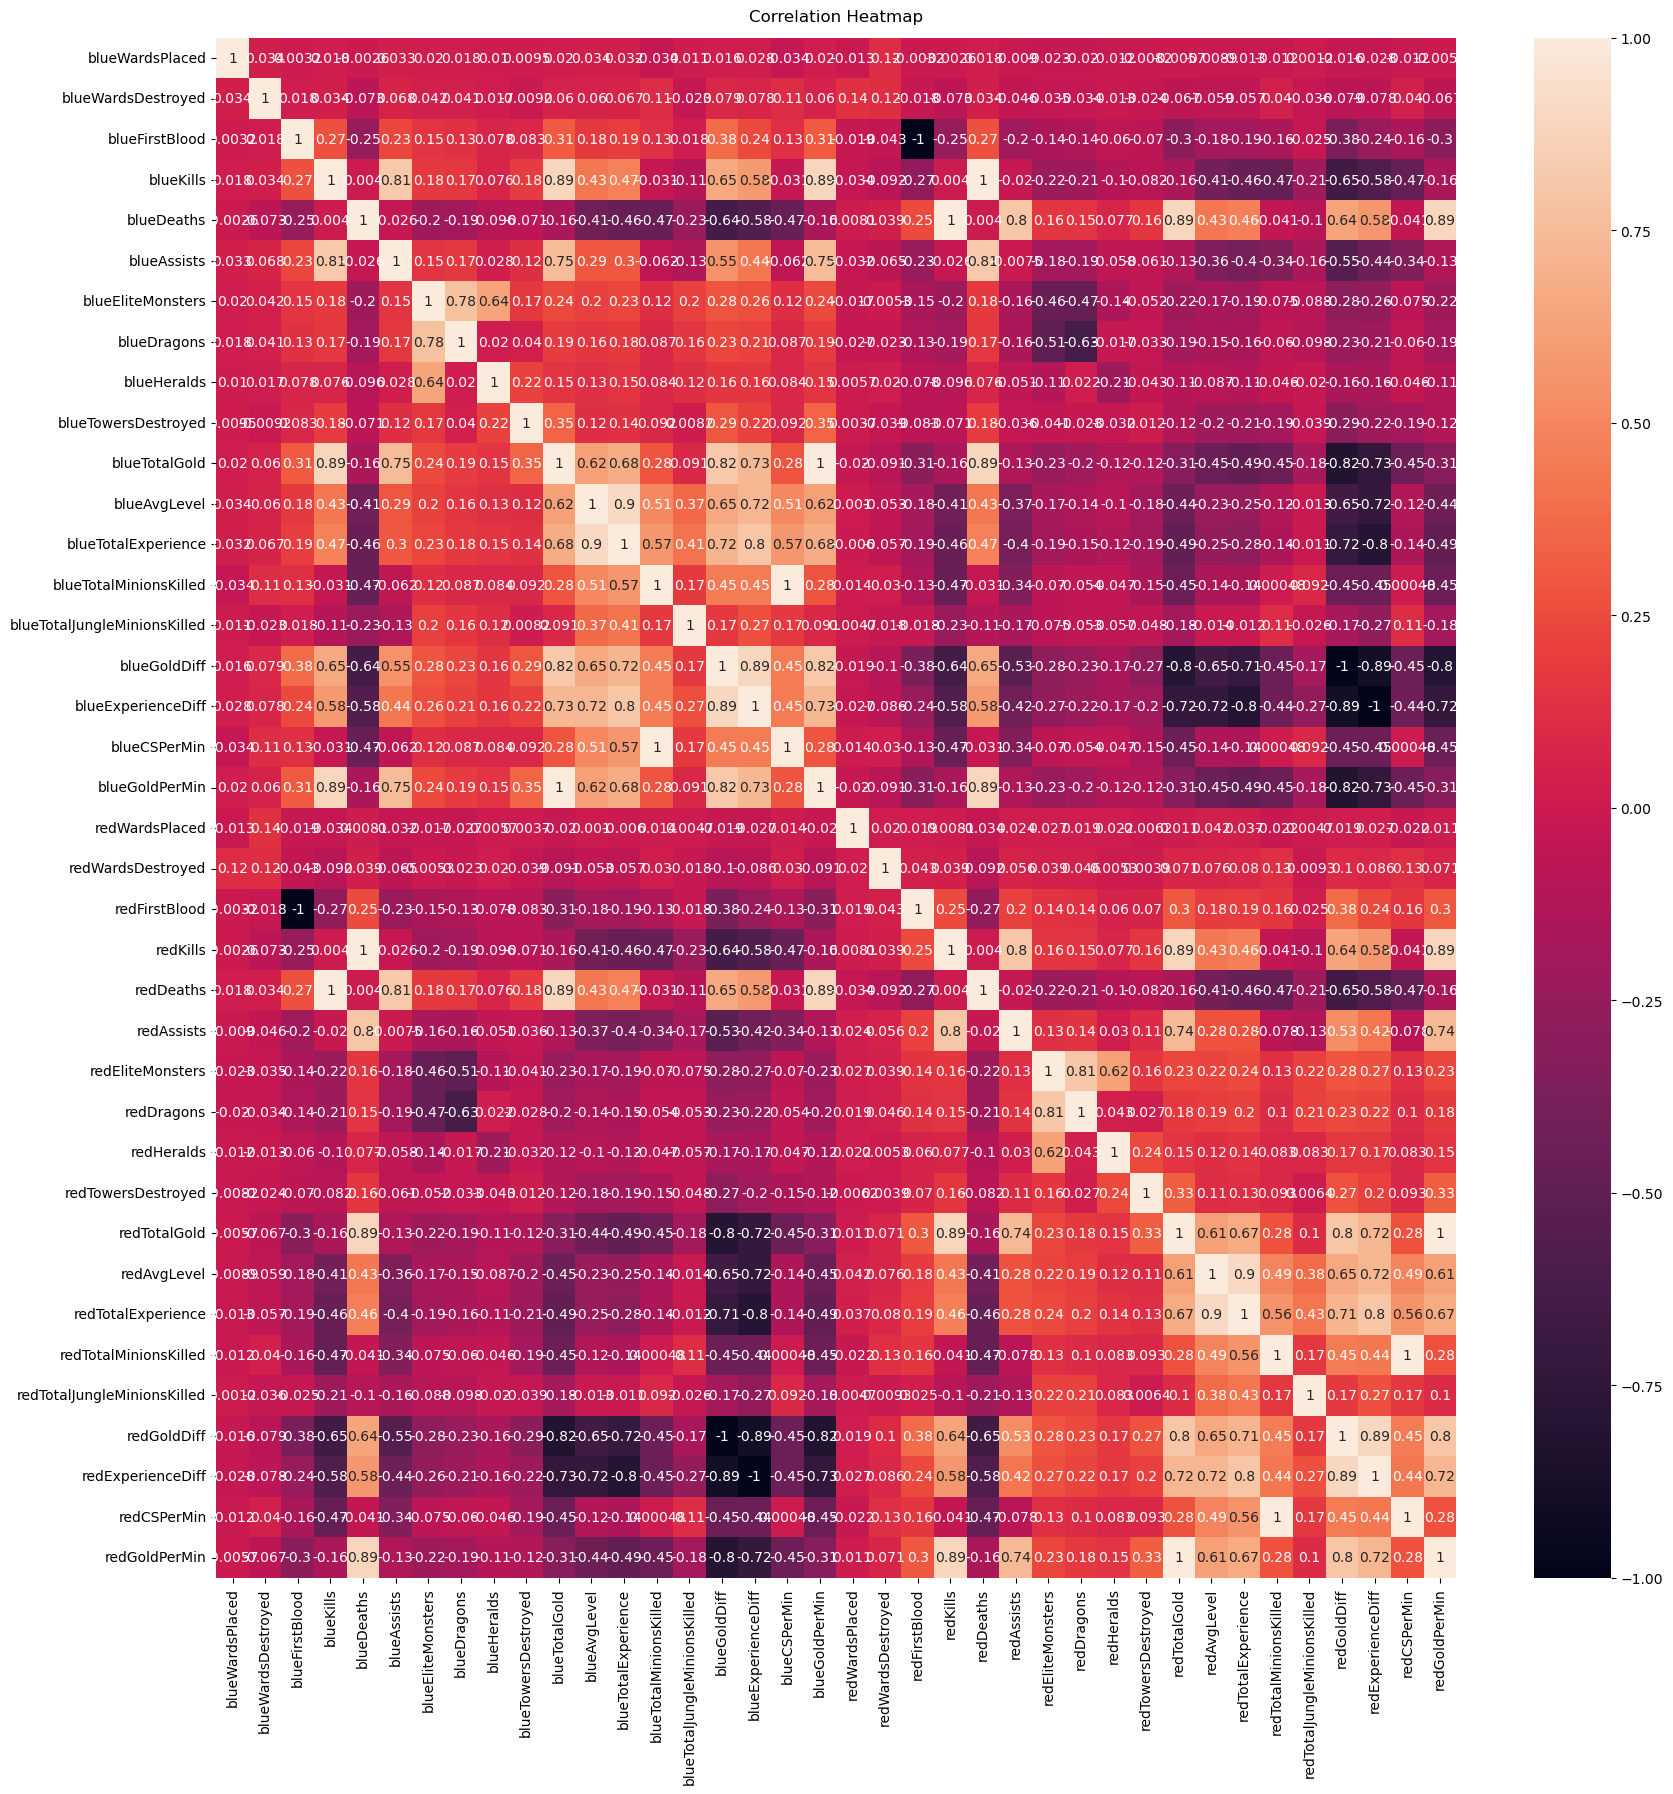

In [51]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(X.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Açık renkler pozitif ilişki, koyular ise negatif ilişki gösterir.

### Aykırı Değer İncelemesi

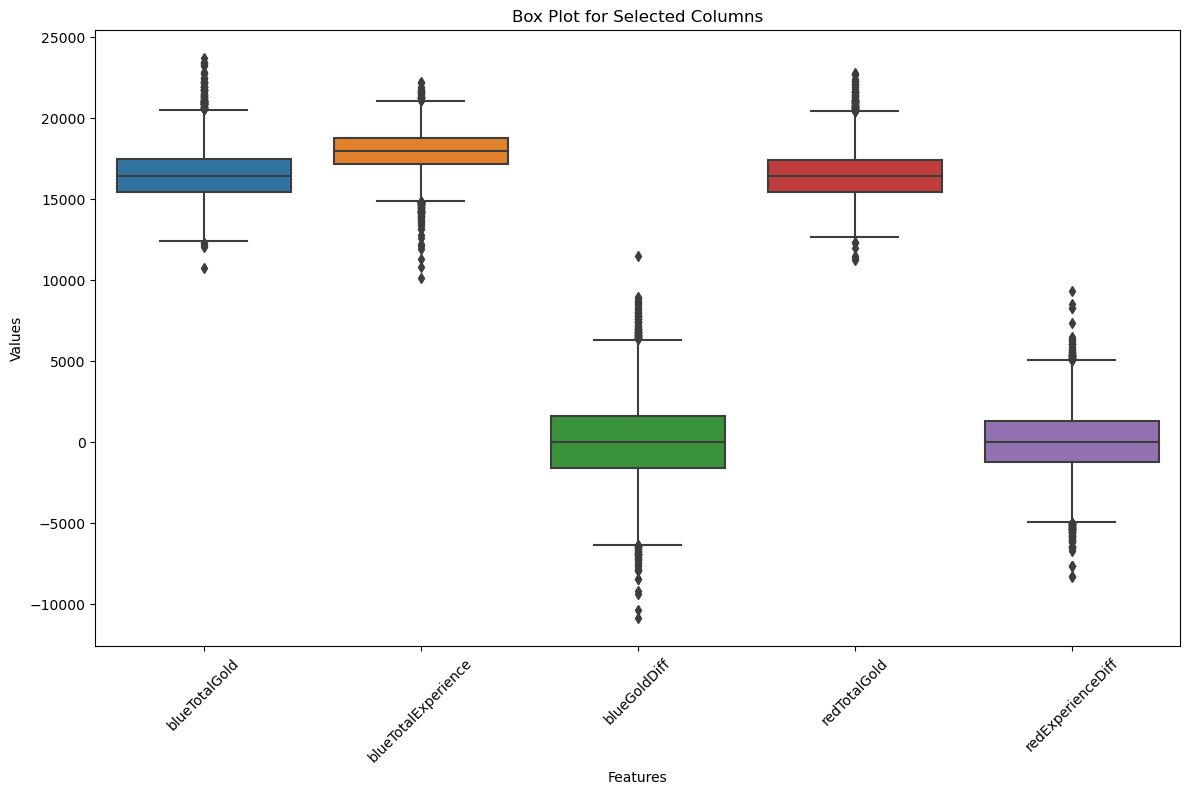

In [52]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[['blueTotalGold', 'blueTotalExperience', 'blueGoldDiff', 'redTotalGold', 'redExperienceDiff']])
plt.title('Box Plot for Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

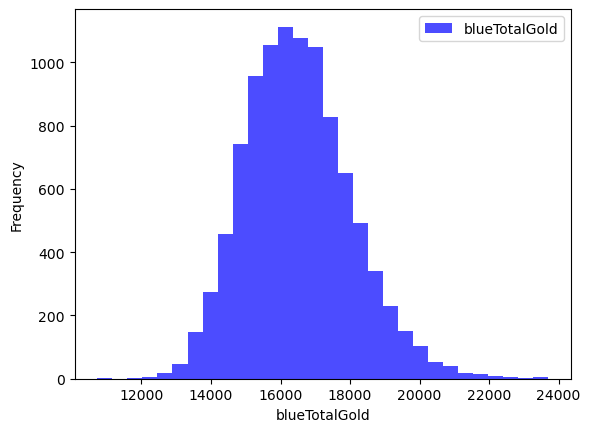

In [53]:
plt.hist(df["blueTotalGold"], bins=30, color='blue', alpha=0.7, label='blueTotalGold')
plt.xlabel('blueTotalGold')
plt.ylabel('Frequency')
plt.legend()
plt.show()

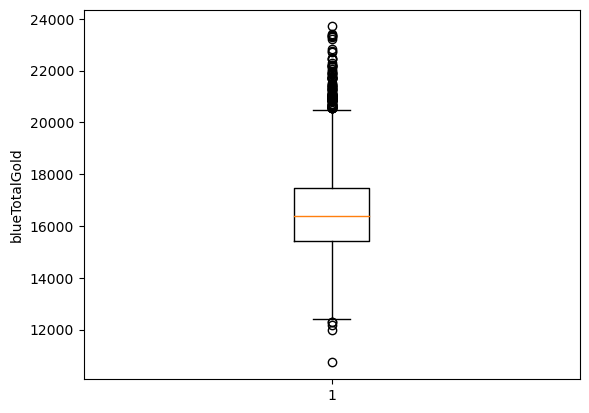

In [54]:
plt.boxplot(df["blueTotalGold"])
plt.ylabel('blueTotalGold')
plt.show()

In [55]:
z_scores = zscore(df["blueTotalGold"])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)
print(df["blueTotalGold"][outliers])

7       21278
45      22472
170     22697
199     21285
356     21699
651     23335
756     10730
777     22745
1075    21202
1305    22449
1384    21297
1805    21883
1834    23359
1964    21658
1978    21872
2275    23205
2585    21257
2911    21703
3037    21927
3143    21986
3295    21437
4028    21314
4044    23701
4163    22433
4286    21728
4319    21132
4451    21352
4608    21755
5108    22173
5194    21382
6248    21462
6282    21266
6314    22049
6380    22177
6472    23278
6969    21386
6988    21747
7309    22228
7522    21783
7606    21442
8032    21416
8124    21908
8151    21512
8361    22212
8435    21893
8538    23424
9056    22134
9099    21663
9151    22845
9271    21711
9281    21132
9309    22296
9636    23349
9669    22162
Name: blueTotalGold, dtype: int64


In [56]:
selected_columns = ['blueTotalGold', 'blueTotalExperience', 'blueGoldDiff', 'redTotalGold', 'redExperienceDiff']

z_scores = pd.DataFrame()
for column in selected_columns:
    z_scores[column] = (df[column] - df[column].mean()) / df[column].std()

# Z skorlarını gösterir
print(z_scores)

      blueTotalGold  blueTotalExperience  blueGoldDiff  redTotalGold  \
0          0.066134             0.027396      0.006761      0.056985   
1          0.486207             0.281452     -0.357232      1.088585   
2          0.914747            -0.352438      0.693984     -0.199909   
3         -1.808891            -1.524426     -1.829505      1.147610   
4         -0.787038            -0.728107      0.034070     -0.866625   
...             ...                  ...           ...           ...   
9874       0.454294             0.012403      0.884336     -0.987359   
9875      -1.565314            -1.153755     -1.882086      1.484993   
9876       0.142333            -1.511932     -0.404514      0.812240   
9877      -0.314212             0.077374     -0.258591      0.101925   
9878       0.616462             0.525512      0.521567     -0.223385   

      redExperienceDiff  
0              0.080911  
1              0.813582  
2             -0.421075  
3              2.698635  
4    

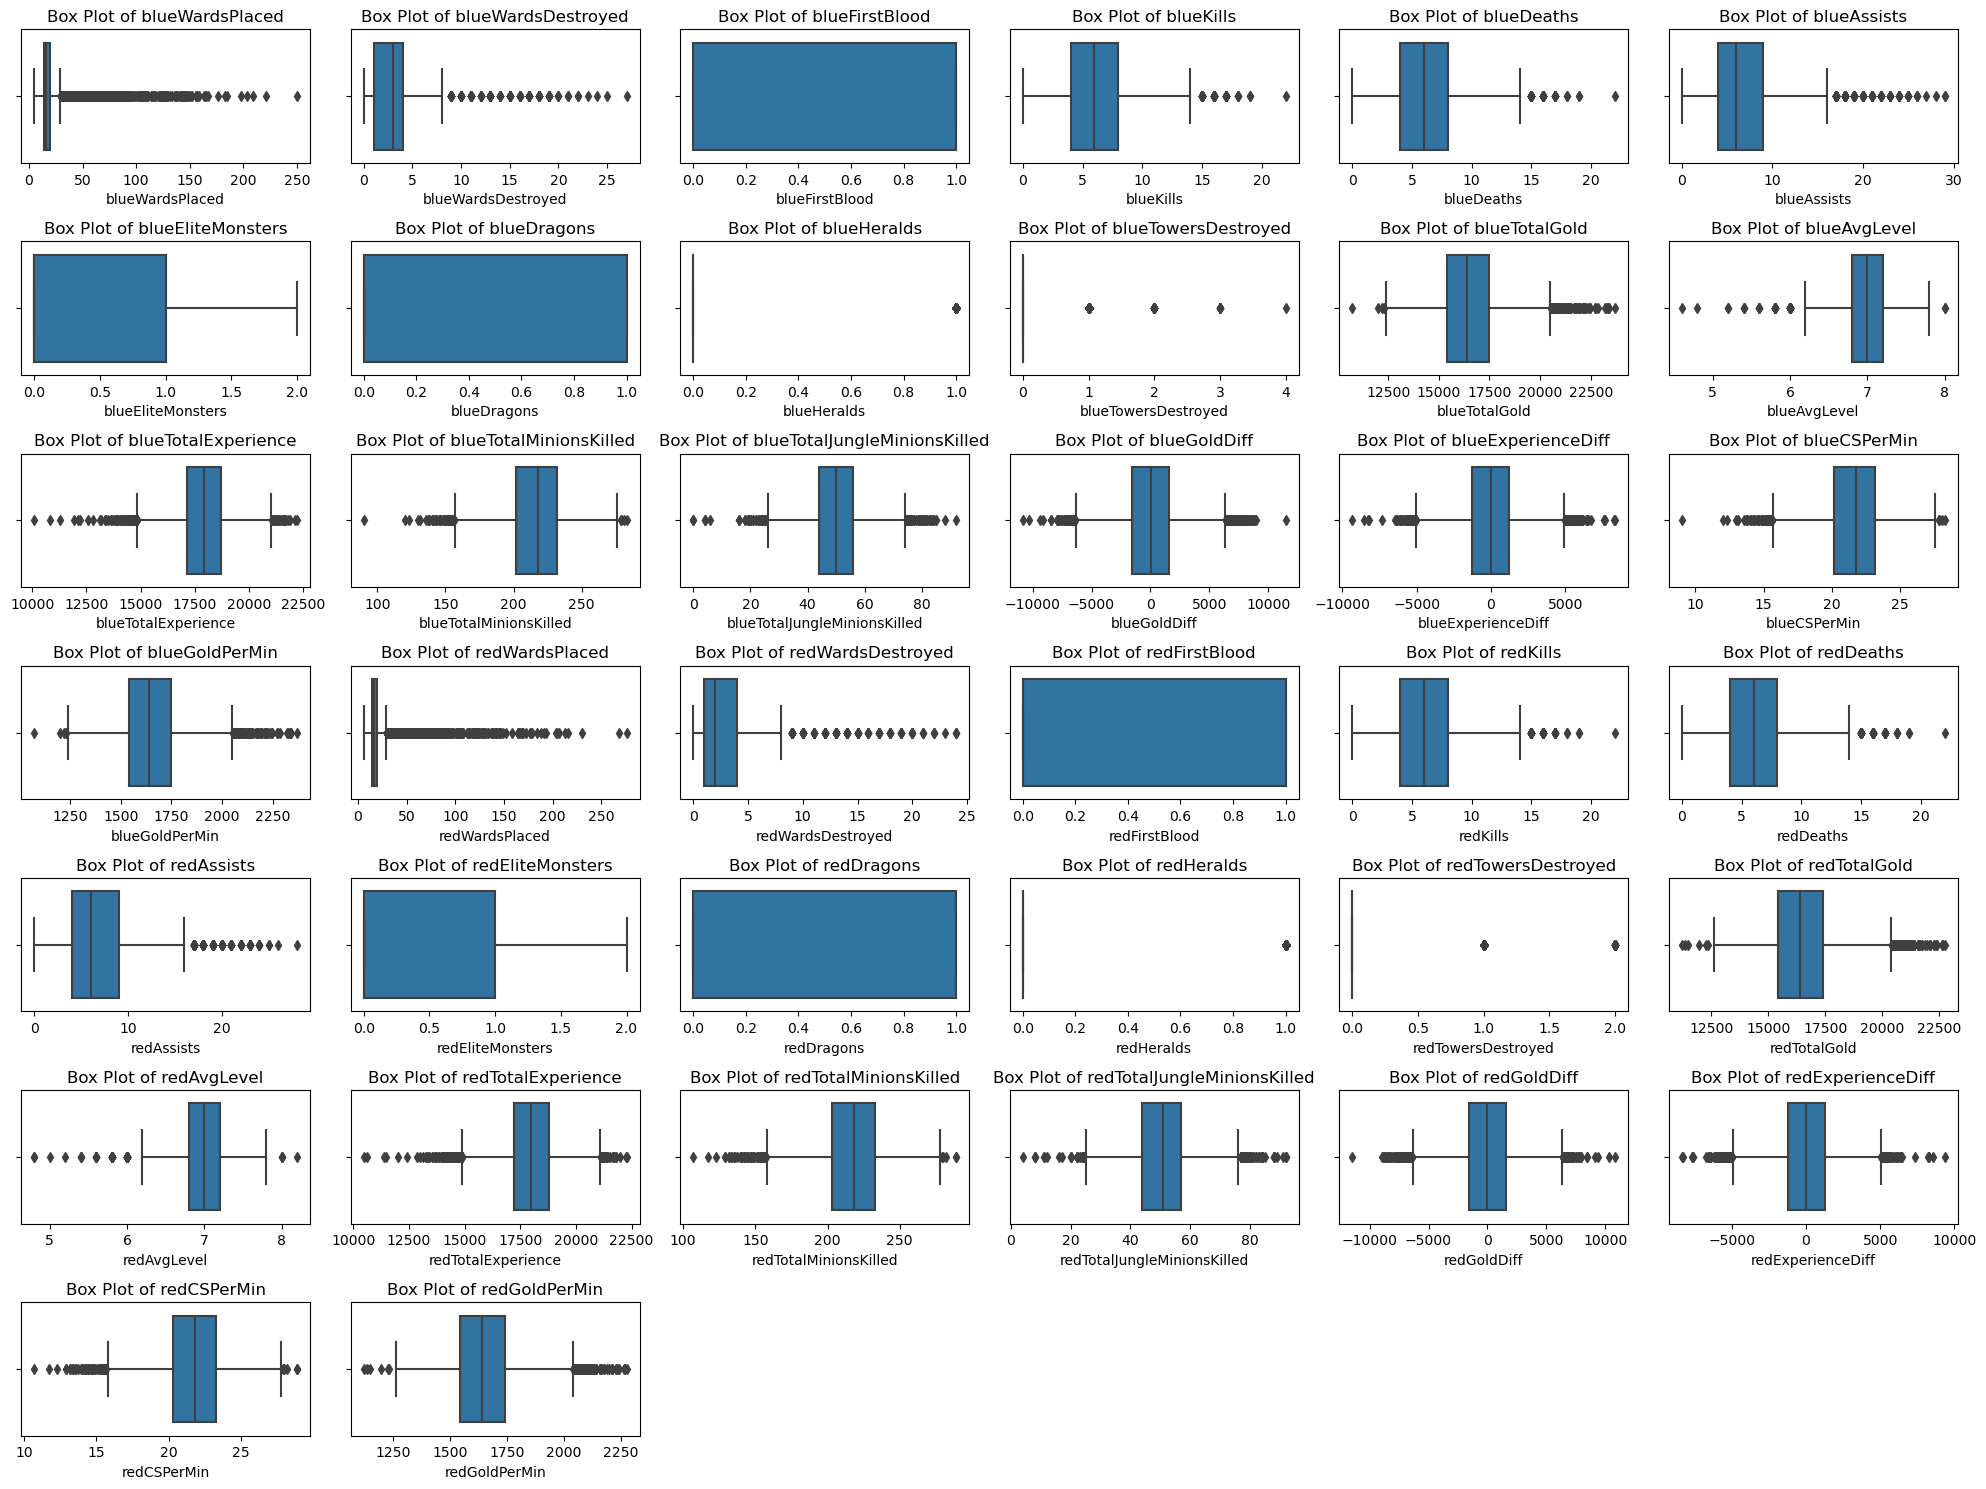

In [57]:
# 'blueWins' dışındaki tüm özellikler için box plot çizimi
plt.figure(figsize=(20, 15))
for i, feature in enumerate(df.columns[1:], 1):
    plt.subplot(7, 6, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [58]:
# Önce IQR fonksiyonunu tanımlıyoruz
def IQR(dataframe, variable, q1=0.25, q3=0.75):
    quartile1 = dataframe[variable].quantile(q1)
    quartile3 = dataframe[variable].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    outliers = [indx for indx in dataframe[variable].index if dataframe.loc[indx, variable] > up_limit or dataframe.loc[indx, variable] < low_limit]
    return outliers

In [59]:
# Ardından IQR analizi fonksiyonunu tanımlayalım
def IQR_analizi(dataframe, q1=0.25, q3=0.75):
    for column in dataframe.select_dtypes(include='number').columns:
        outliers = IQR(dataframe, column, q1, q3)
        normal_values = len(dataframe) - len(outliers)
        aykiri_values = len(outliers)
        if normal_values != 0 or aykiri_values != 0:
            print(f"{column}:")
            print(f"Normal Değer Sayısı: {normal_values}")
            print(f"Aykırı Değer Sayısı: {aykiri_values}")
            print("-" * 40)

In [60]:
IQR_analizi(df)

blueWins:
Normal Değer Sayısı: 9879
Aykırı Değer Sayısı: 0
----------------------------------------
blueWardsPlaced:
Normal Değer Sayısı: 8252
Aykırı Değer Sayısı: 1627
----------------------------------------
blueWardsDestroyed:
Normal Değer Sayısı: 9743
Aykırı Değer Sayısı: 136
----------------------------------------
blueFirstBlood:
Normal Değer Sayısı: 9879
Aykırı Değer Sayısı: 0
----------------------------------------
blueKills:
Normal Değer Sayısı: 9791
Aykırı Değer Sayısı: 88
----------------------------------------
blueDeaths:
Normal Değer Sayısı: 9814
Aykırı Değer Sayısı: 65
----------------------------------------
blueAssists:
Normal Değer Sayısı: 9670
Aykırı Değer Sayısı: 209
----------------------------------------
blueEliteMonsters:
Normal Değer Sayısı: 9879
Aykırı Değer Sayısı: 0
----------------------------------------
blueDragons:
Normal Değer Sayısı: 9879
Aykırı Değer Sayısı: 0
----------------------------------------
blueHeralds:
Normal Değer Sayısı: 8022
Aykırı Değe

In [61]:
for column in df.columns:
    mean_value = df[column].mean()
    std_dev = df[column].std()

    # eşik değerlerini belirliyoruz
    lower_threshold = mean_value - 3 * std_dev
    upper_threshold = mean_value + 3 * std_dev

    # Aykırı değerleri filtreleyelim
    outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

    print(f"Aykırı Değerler ({column}):")
    print(outliers)
    print("-" * 40)

Aykırı Değerler (blueWins):
Empty DataFrame
Columns: [blueWins, blueWardsPlaced, blueWardsDestroyed, blueFirstBlood, blueKills, blueDeaths, blueAssists, blueEliteMonsters, blueDragons, blueHeralds, blueTowersDestroyed, blueTotalGold, blueAvgLevel, blueTotalExperience, blueTotalMinionsKilled, blueTotalJungleMinionsKilled, blueGoldDiff, blueExperienceDiff, blueCSPerMin, blueGoldPerMin, redWardsPlaced, redWardsDestroyed, redFirstBlood, redKills, redDeaths, redAssists, redEliteMonsters, redDragons, redHeralds, redTowersDestroyed, redTotalGold, redAvgLevel, redTotalExperience, redTotalMinionsKilled, redTotalJungleMinionsKilled, redGoldDiff, redExperienceDiff, redCSPerMin, redGoldPerMin]
Index: []
----------------------------------------
Aykırı Değerler (blueWardsPlaced):
      blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0            0               84                   3               1   
50           0               78                   1               1   
112       

In [88]:
for column in df.columns[1:]:
    mean_value = df[column].mean()
    std_dev = df[column].std()

    # Sınır değerleri belirleme
    lower_threshold = mean_value - 3 * std_dev
    upper_threshold = mean_value + 3 * std_dev

    # Aykırı değerleri filtreleme
    outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

    # Aykırı değerleri gösterme
    print(f"Aykırı Değerler ({column}):")
    print(outliers)
    print("-" * 40)

    # Aykırı değerleri kesme (Trimming)
    df = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]

    # Aykırı değerlere sınırlar koyma (Capping)
    df[column] = np.where(df[column] > upper_threshold, upper_threshold,
                          np.where(df[column] < lower_threshold, lower_threshold, df[column]))

    # İstatistikleri gösterme
    print(f"\nİstatistikler ({column}):")
    print(df[column].describe())
    print("-" * 40)

Aykırı Değerler (blueWardsPlaced):
      blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
82         0.0             49.0                 4.0             0.0   
162        0.0             42.0                 0.0             0.0   
216        1.0             42.0                 3.0             0.0   
289        0.0             43.0                 3.0             0.0   
401        1.0             44.0                 3.0             1.0   
...        ...              ...                 ...             ...   
9658       0.0             46.0                 3.0             0.0   
9748       1.0             45.0                 1.0             0.0   
9784       1.0             43.0                 4.0             0.0   
9800       0.0             44.0                 5.0             1.0   
9805       1.0             46.0                 4.0             0.0   

      blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
82          3.0         5.0         

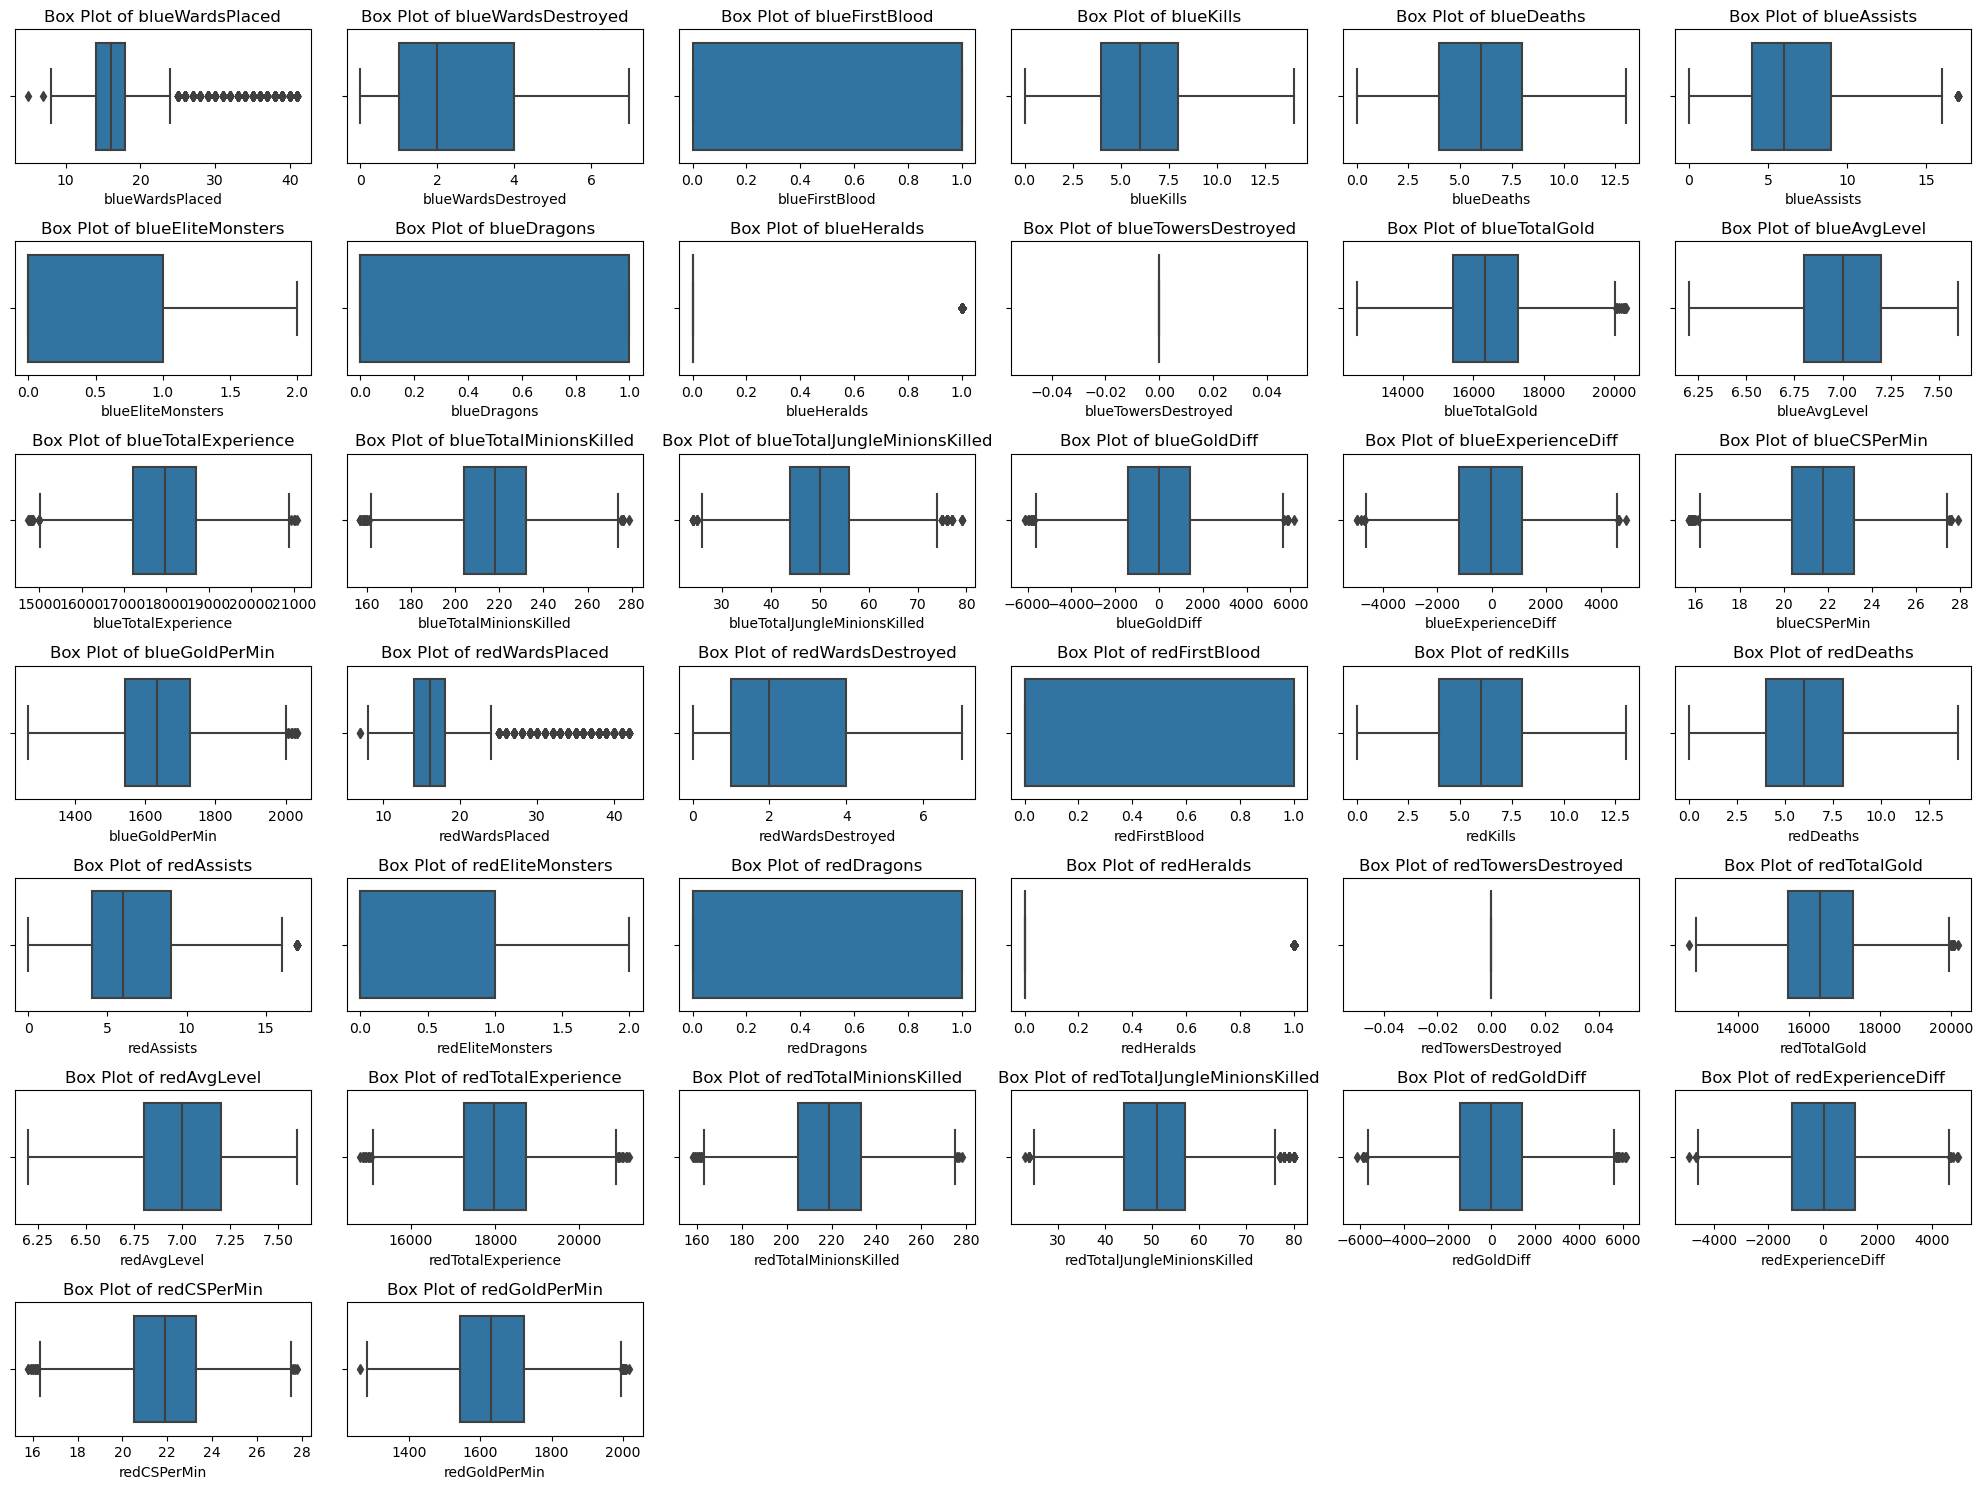

In [90]:
# 'blueWins' dışındaki tüm özellikler için box plot çizimi
plt.figure(figsize=(20, 15))
for i, feature in enumerate(df.columns[1:], 1):
    plt.subplot(7, 6, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

## Model 

In [63]:
train_test_split = 0.7

num_examples = X.shape[0] #9878 rows

num_train_examples = int(np.floor(num_examples * train_test_split))
num_test_examples = int(np.ceil(num_examples - num_train_examples))

print(f'The total number of samples {num_examples};\nThe total number of training samples {num_train_examples}; \nThe the total number of test samples {num_test_examples}; ')

The total number of samples 9879;
The total number of training samples 6915; 
The the total number of test samples 2964; 


In [64]:
X_train = X.iloc[0:num_train_examples, :]
y_train = y.iloc[0:num_train_examples]

X_test = X.iloc[num_train_examples:num_examples, :]
y_test = y.iloc[num_train_examples:num_examples]

### Optimizer Ayarlıyoruz

In [65]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

### Modeli Tanımlıyoruz

In [66]:
inputs = tf.keras.Input(shape=(38,))
x = tf.keras.layers.Dense(64, activation=tf.nn.relu)(inputs)
x = tf.keras.layers.Dense(32, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(16, activation=tf.nn.relu)(x)
outputs = tf.keras.layers.Dense(2, activation=tf.nn.softmax)(x) # sigmoid for binary classification denenecek daha sonra

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense (Dense)               (None, 64)                2496      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 2)                 34        
                                                                 
Total params: 5138 (20.07 KB)
Trainable params: 5138 (20.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
BATCH_SIZE = 32
EPOCHS = 300

In [69]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/300
173/173 [==============================] - 2s 4ms/step - loss: 40.9758 - accuracy: 0.6367 - val_loss: 21.7122 - val_accuracy: 0.6551
Epoch 2/300
173/173 [==============================] - 0s 2ms/step - loss: 12.8585 - accuracy: 0.6417 - val_loss: 8.2981 - val_accuracy: 0.7035
Epoch 3/300
173/173 [==============================] - 0s 2ms/step - loss: 13.9502 - accuracy: 0.6453 - val_loss: 26.1034 - val_accuracy: 0.6204
Epoch 4/300
173/173 [==============================] - 0s 2ms/step - loss: 15.1449 - accuracy: 0.6359 - val_loss: 33.5753 - val_accuracy: 0.5850
Epoch 5/300
173/173 [==============================] - 0s 2ms/step - loss: 8.8912 - accuracy: 0.6482 - val_loss: 10.4076 - val_accuracy: 0.6978
Epoch 6/300
173/173 [==============================] - 0s 2ms/step - loss: 13.4428 - accuracy: 0.6432 - val_loss: 8.6314 - val_accuracy: 0.6233
Epoch 7/300
173/173 [==============================] - 0s 2ms/step - loss: 7.2402 - accuracy: 0.6470 - val_loss: 7.5598 - val_accurac

In [70]:
loss, accuracy = model.evaluate(X_test, y_test)

93/93 [==============================] - 0s 872us/step - loss: 0.5461 - accuracy: 0.7237


In [71]:
y_pred = np.argmax(model.predict(X_test), axis=1)

93/93 [==============================] - 0s 704us/step


In [72]:
cm = confusion_matrix(y_test, y_pred)

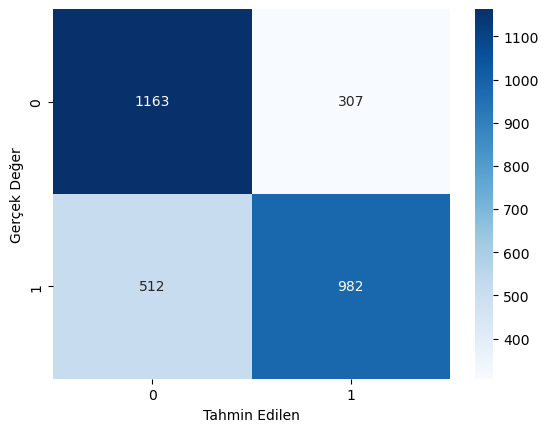

In [73]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.show() 

In [74]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1163  307]
 [ 512  982]]


In [75]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1470
           1       0.76      0.66      0.71      1494

    accuracy                           0.72      2964
   macro avg       0.73      0.72      0.72      2964
weighted avg       0.73      0.72      0.72      2964

